# Laboratorium 9 - zadanie 2

## Import zależności

In [1]:
import matplotlib as ml
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from skimage import measure

from PIL import Image
from PIL import ImageOps    

import numpy as np 
from numpy import fft
from numpy import linalg

import cv2
import importlib
import editdistance

In [2]:
import image_tools
importlib.reload(image_tools)
from image_tools import read_img, convert_img, detect_angle

In [3]:
import fonts_manager
importlib.reload(fonts_manager)
from fonts_manager import FontsManager

In [4]:
import ocr
importlib.reload(ocr)
from ocr import Ocr

## Funkcje pomocnicze

In [5]:
def show_img(img, cmap='gray', scale=50):
    plt.figure(figsize=(img.shape[0] // scale, img.shape[1] // scale))
    plt.imshow(img, cmap=cmap, interpolation='none')
    plt.show()

In [6]:
def show_bar_plot(first, second, labels, first_label, second_label, ylabel):
    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, first, width, label=first_label)
    rects2 = ax.bar(x + width/2, second, width, label=second_label)

    ax.set_ylabel(ylabel)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()
    plt.show()

In [7]:
def show_bar_plot_4(first, second, third, fourth, labels, first_label, second_label, third_label, fourth_label, ylabel):
    x = np.arange(len(labels))
    width = 0.2

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, first, width, label=first_label)
    rects2 = ax.bar(x , second, width, label=second_label)
    rects3 = ax.bar(x + width, third, width, label=third_label)
    rects4 = ax.bar(x + width * 2, fourth, width, label=fourth_label)

    ax.set_ylabel(ylabel)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()
    plt.show()

In [8]:
def letters_count(text):
    count = {}
    for char in text:
        if char in count:
            count[char] += 1
        else:
            count[char] = 1
    return count

In [9]:
def print_count(text, stop=False):
    count = letters_count(text)
    order = FontsManager(stop).chars_order
    com = False
    for char in order:
        if char in count: 
            print('Found ', count[char], 'occurrences of character', char)
        else: 
            com = True
    if com:
        print('No other characters found')

## Test działania programu

In [10]:
ocr = Ocr()

### Czcionki testowe

W celu przetestowania programu zastosowałem czcionki z rodziny Roboto, w wersji bezszeryfowej i szeryfowej.

**Sans serif: Roboto Mono**

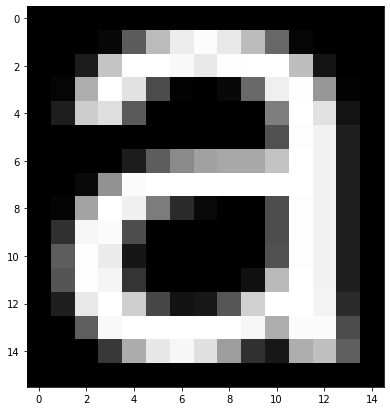

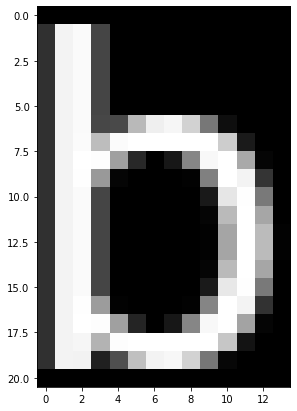

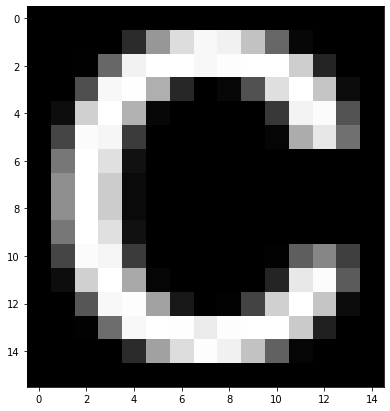

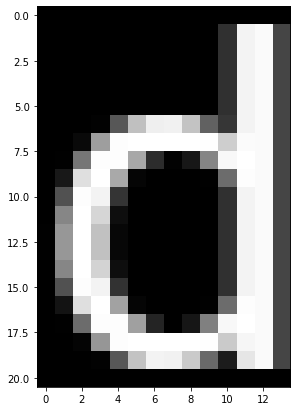

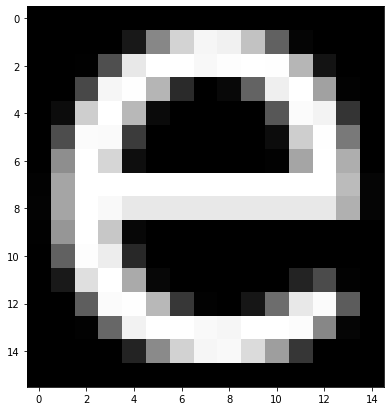

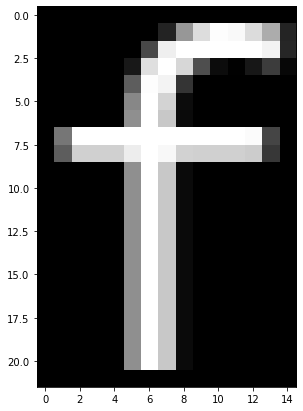

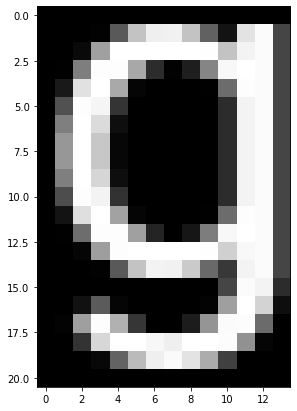

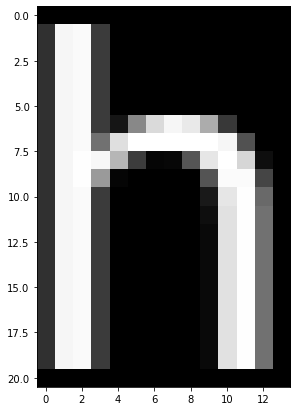

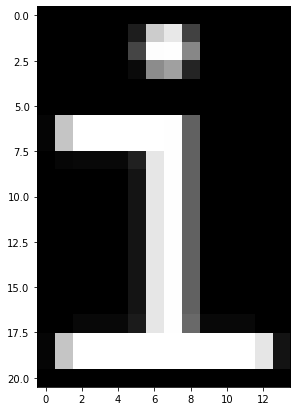

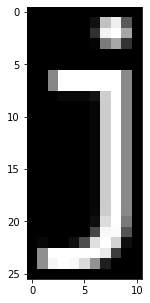

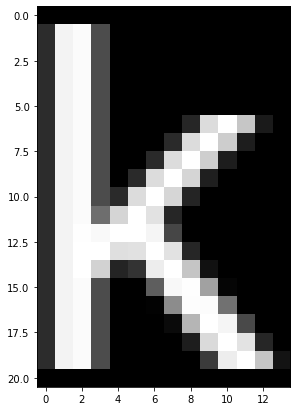

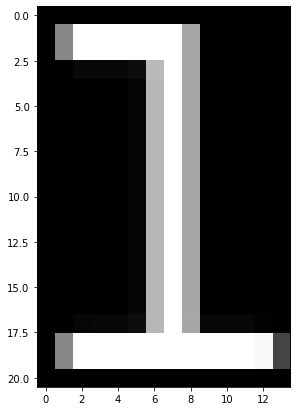

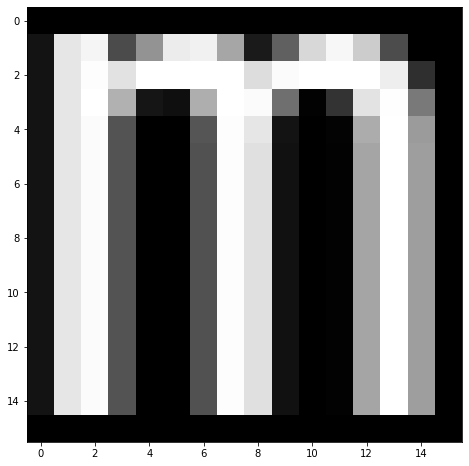

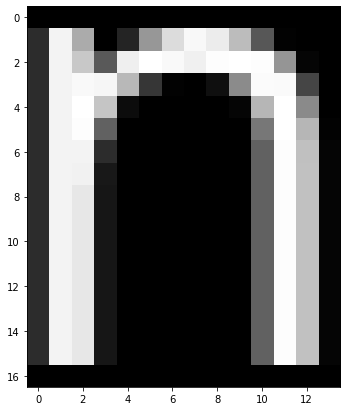

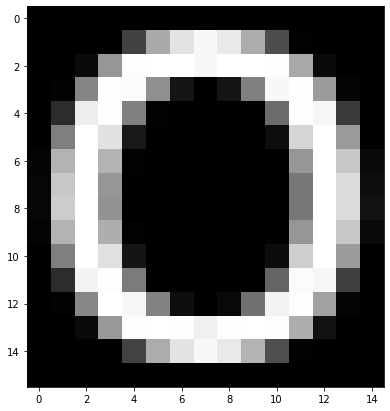

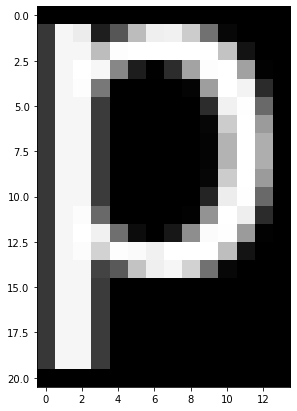

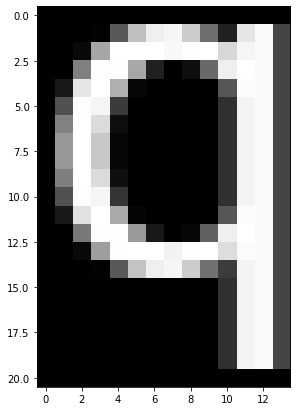

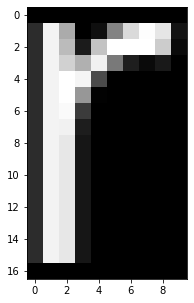

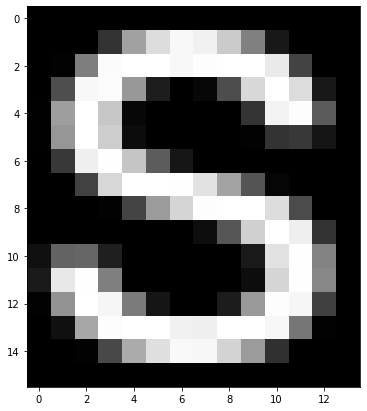

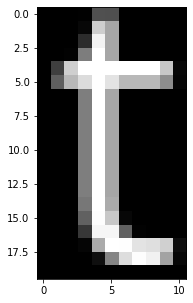

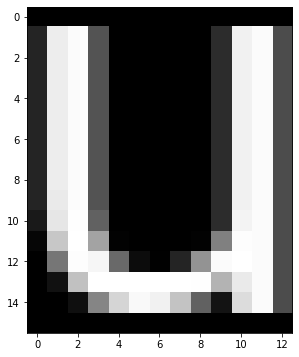

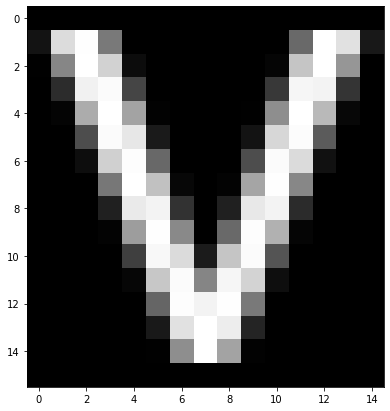

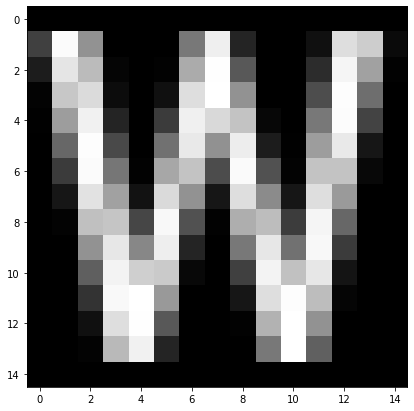

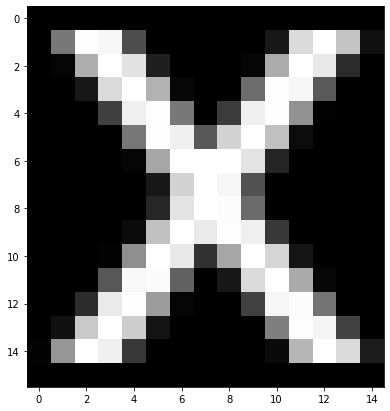

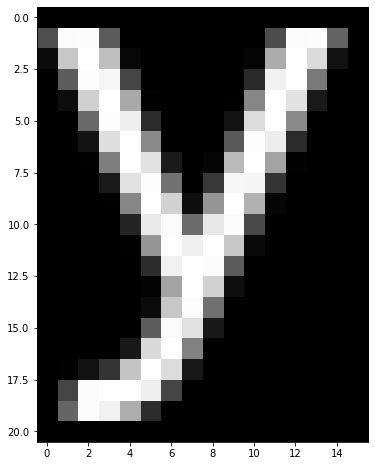

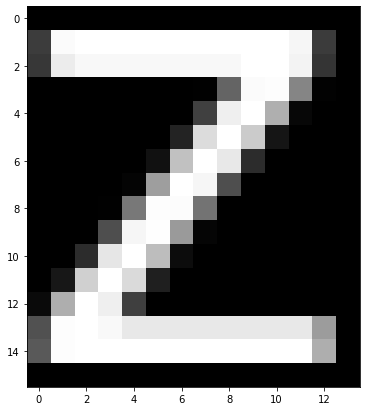

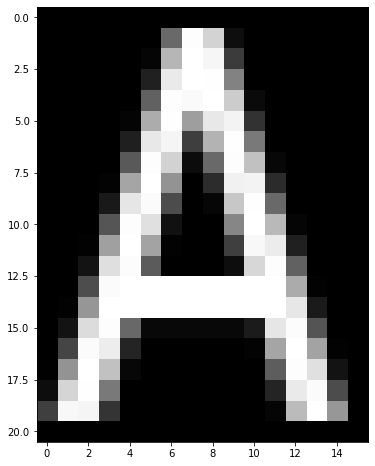

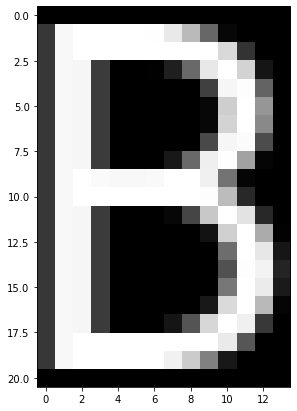

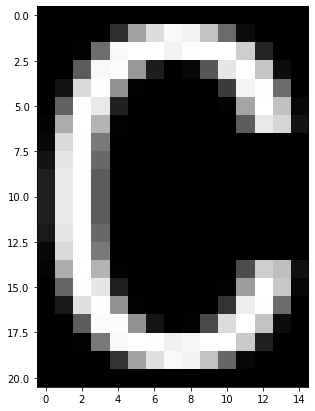

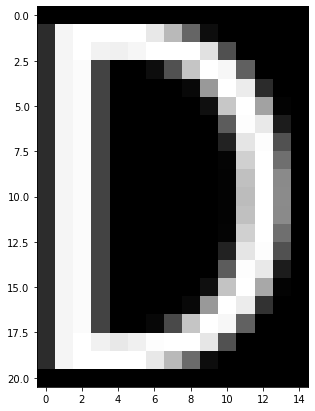

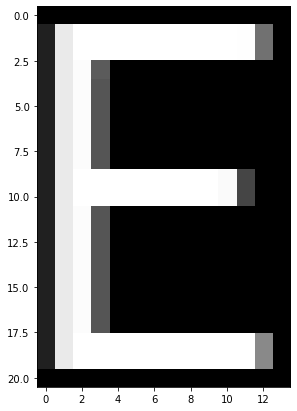

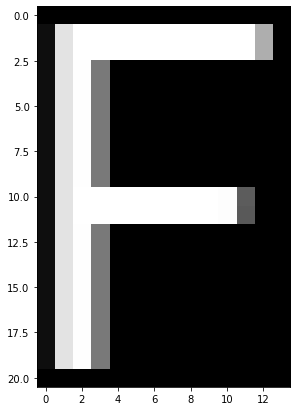

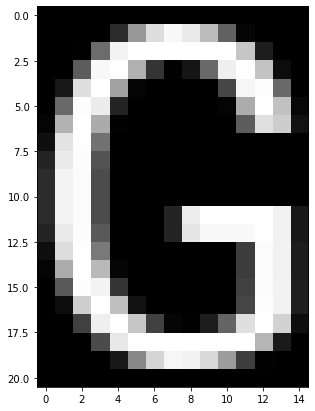

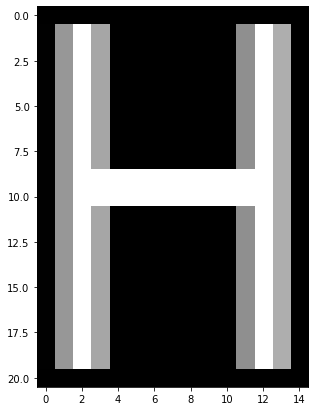

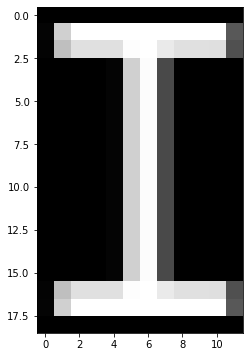

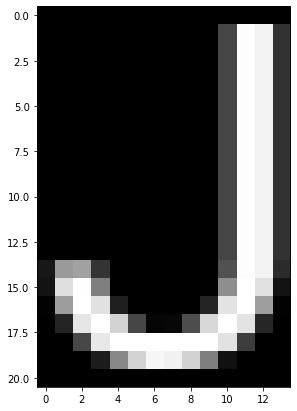

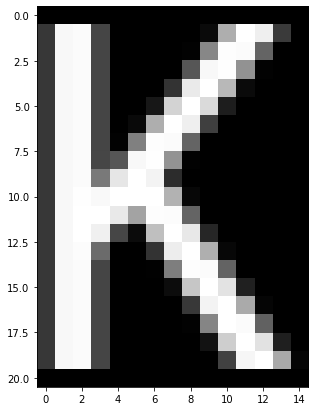

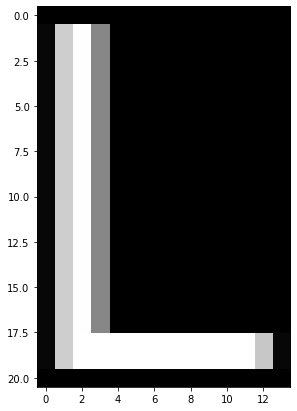

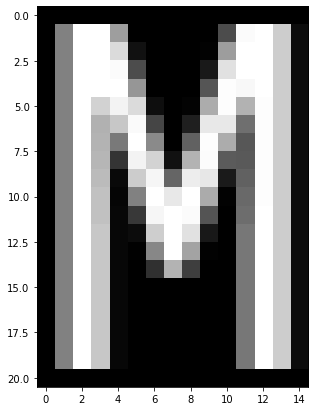

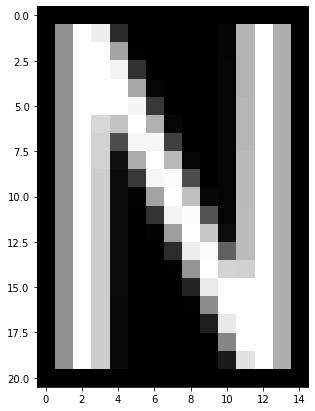

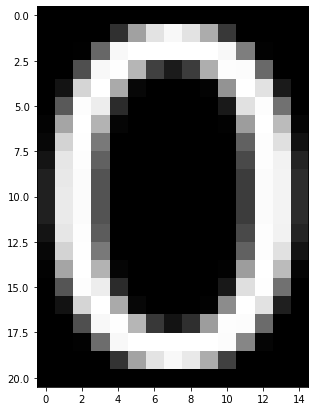

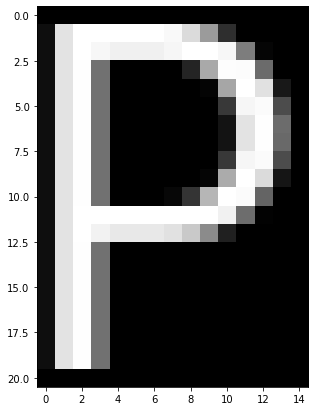

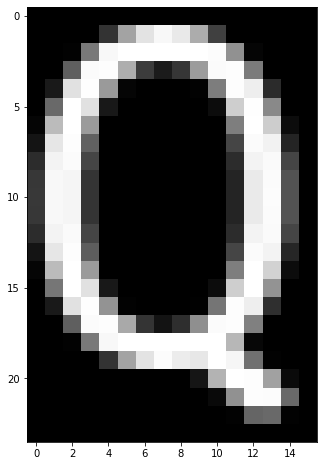

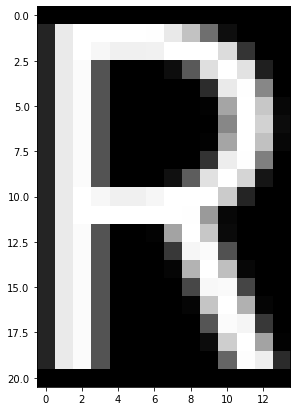

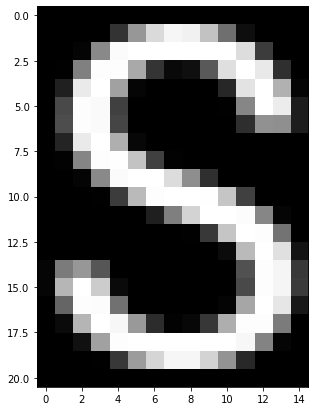

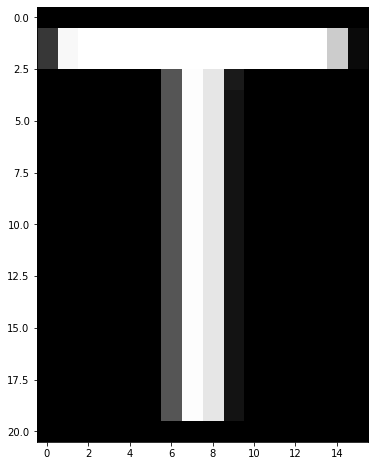

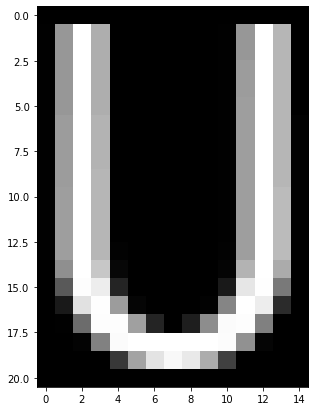

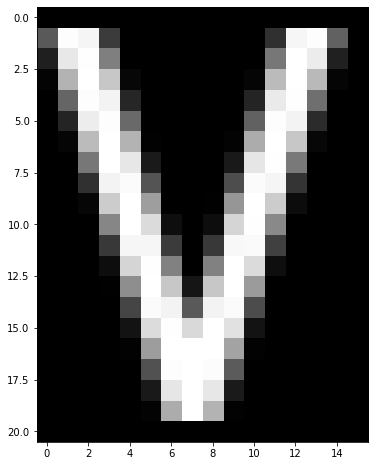

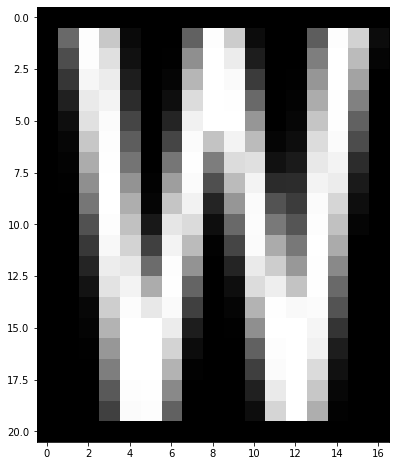

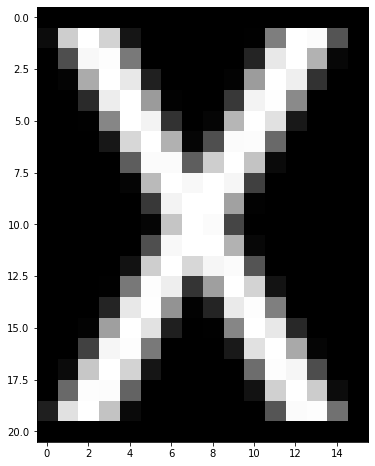

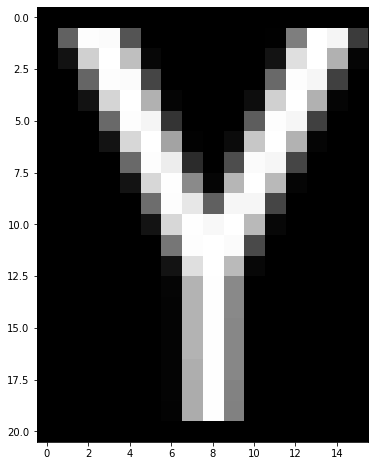

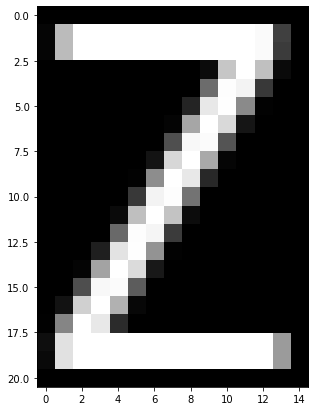

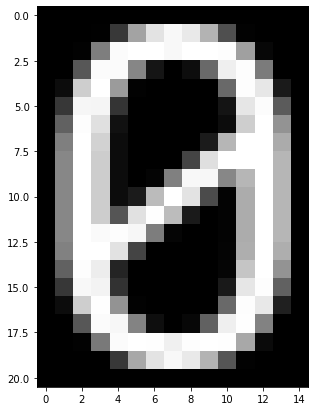

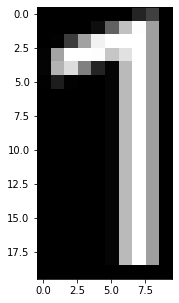

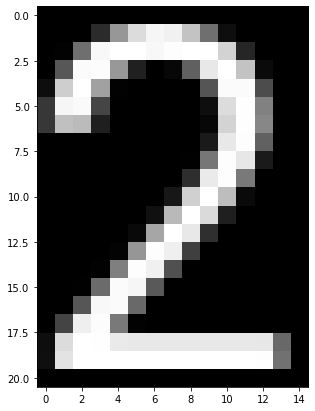

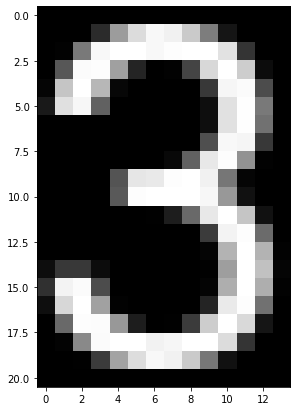

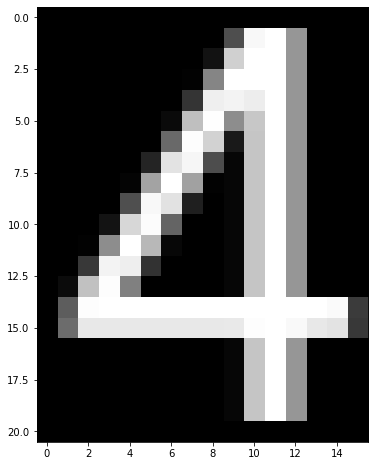

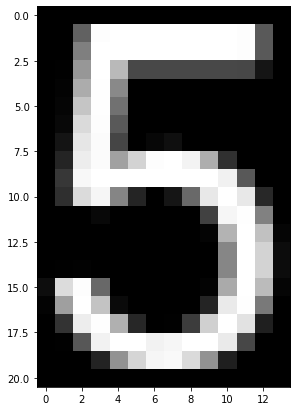

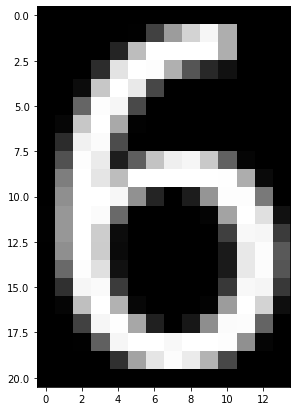

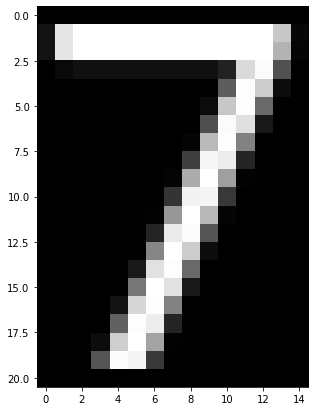

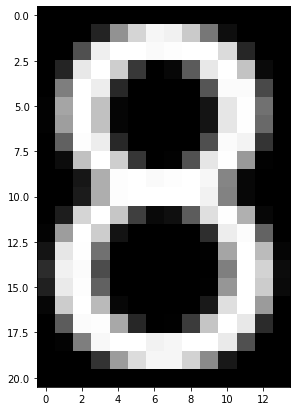

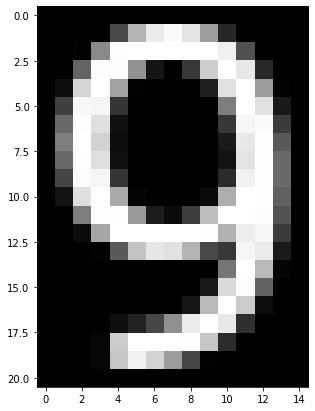

In [11]:
chars = ocr.fonts_manager.get_chars_img('roboto_mono')
for char in chars:
    show_img(char, scale=2)

**Serif: Roboto Slab**

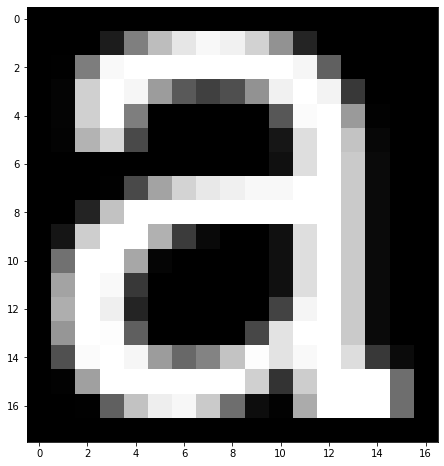

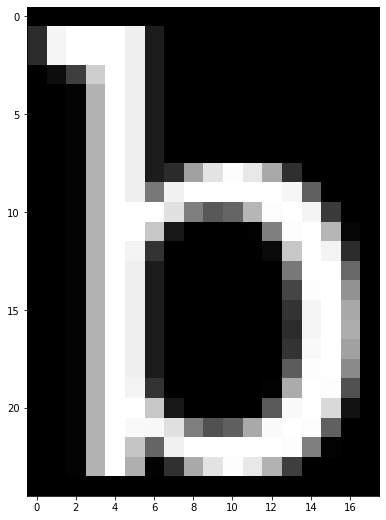

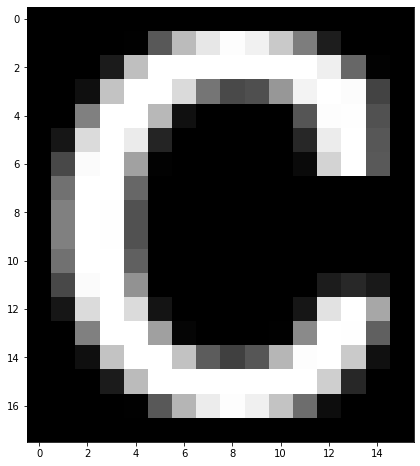

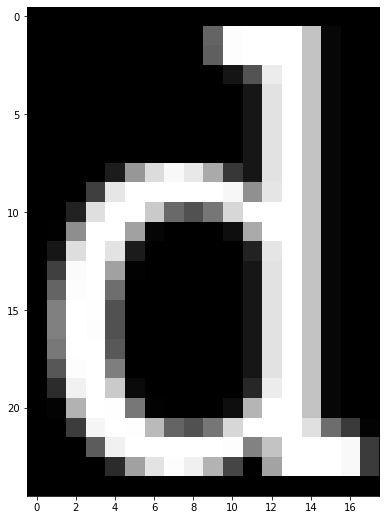

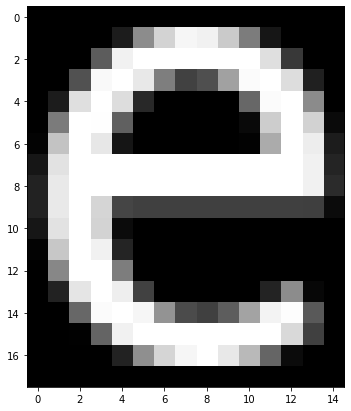

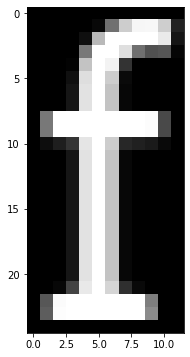

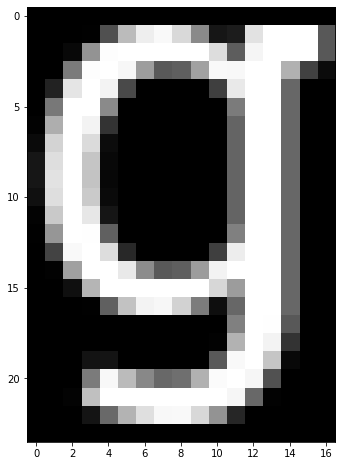

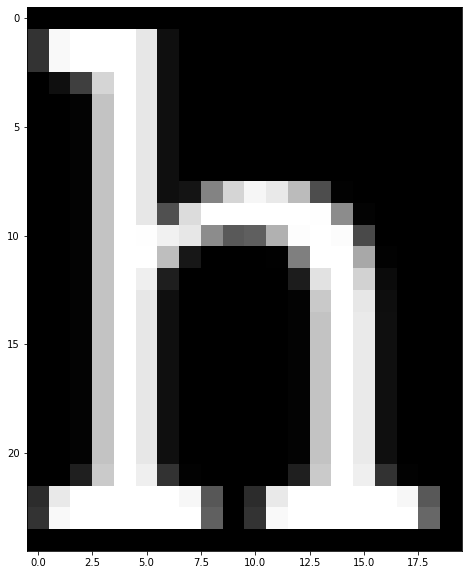

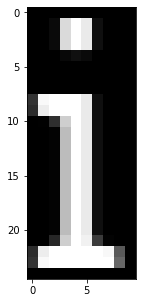

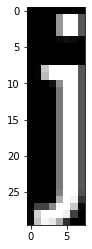

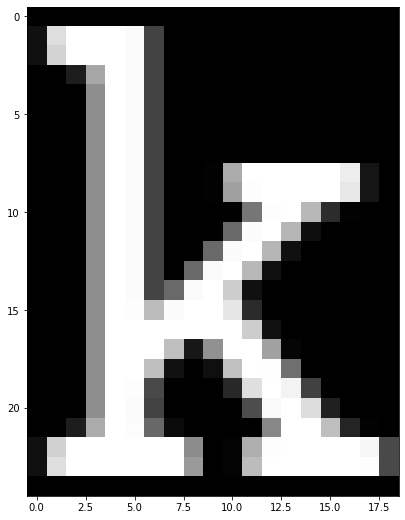

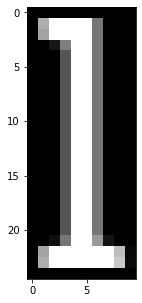

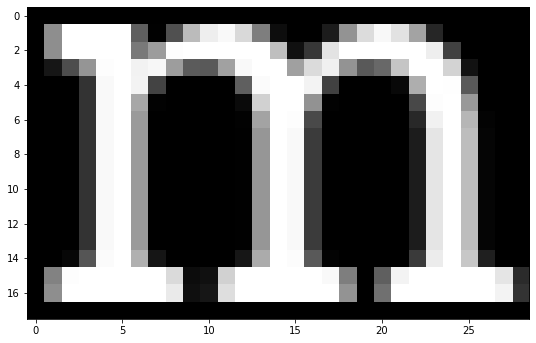

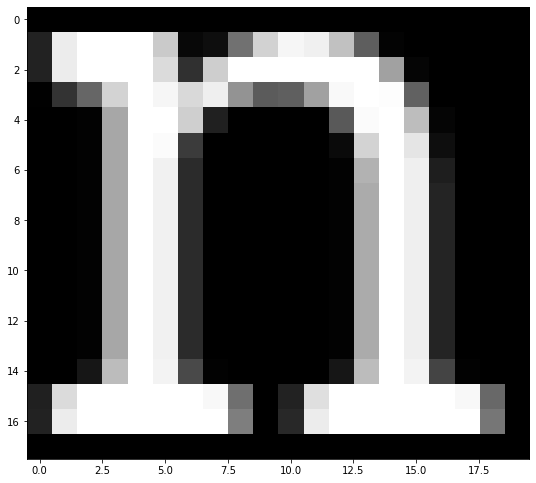

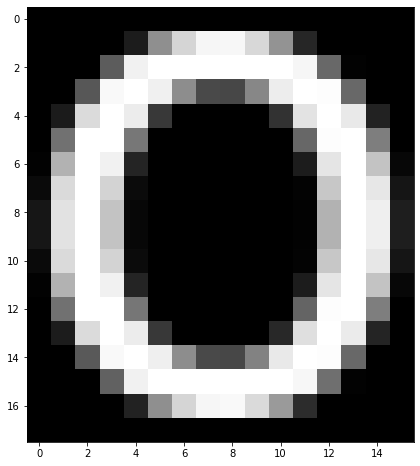

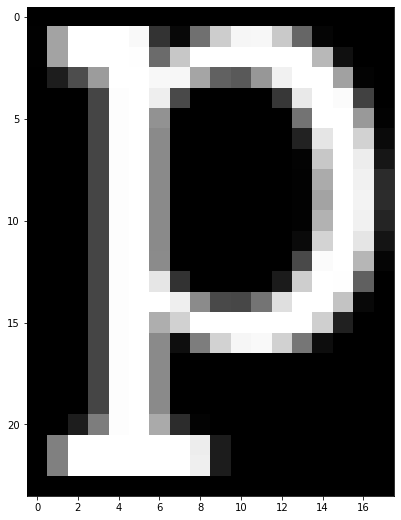

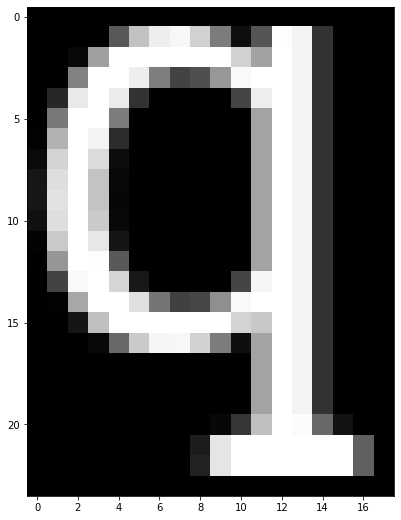

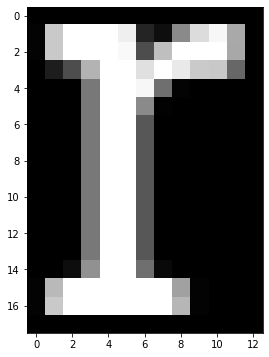

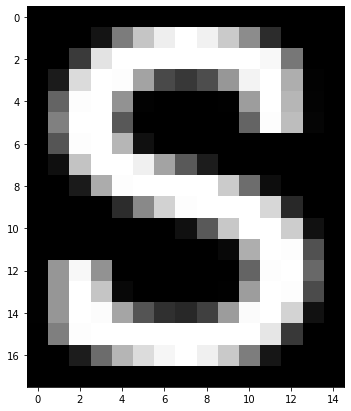

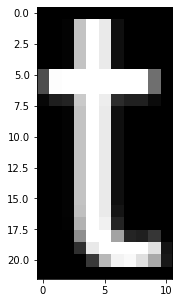

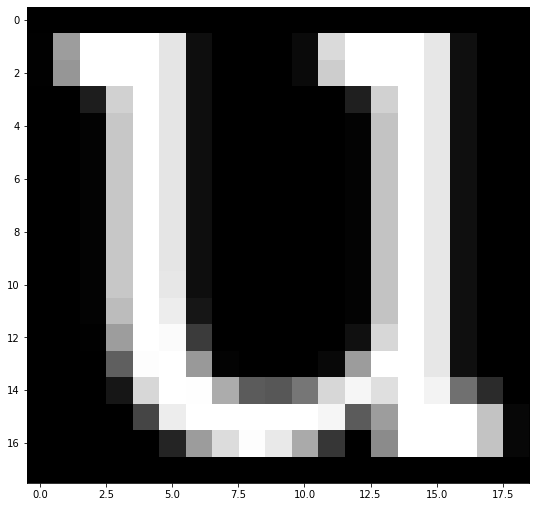

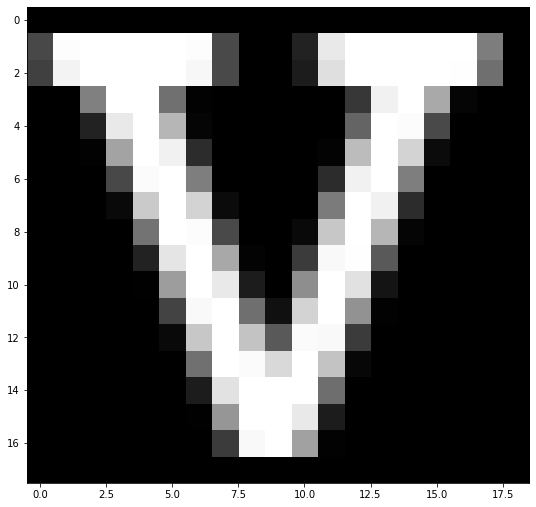

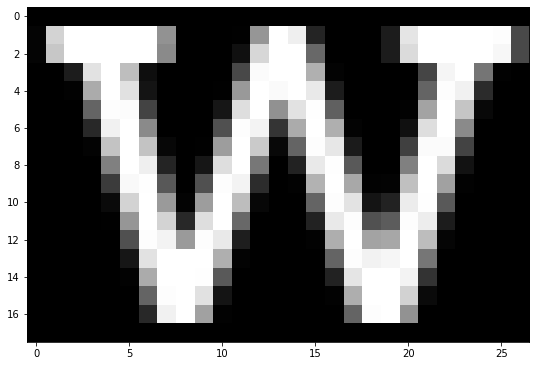

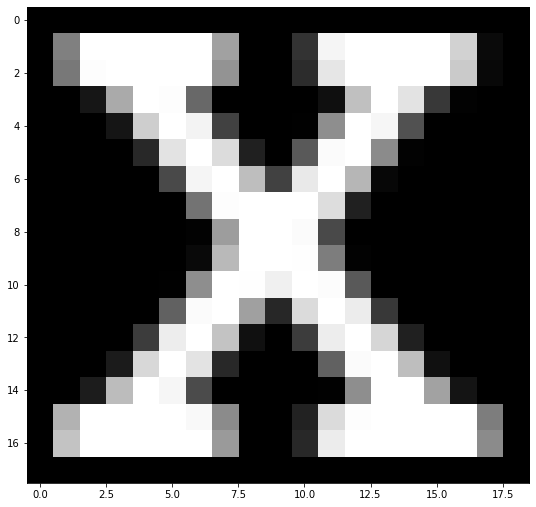

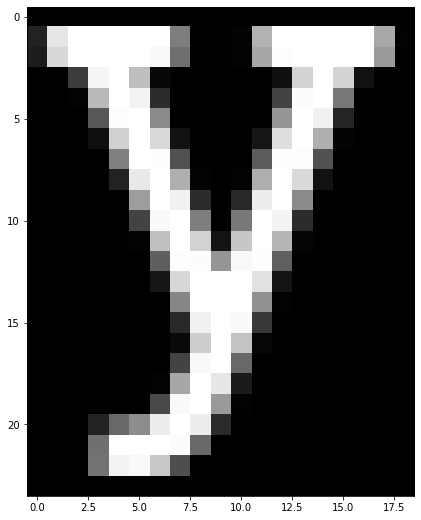

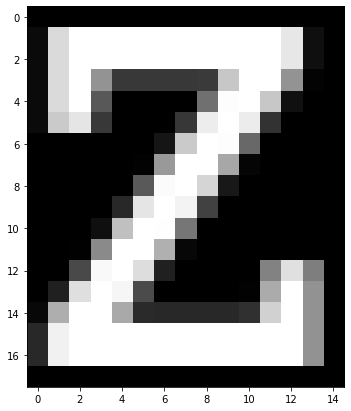

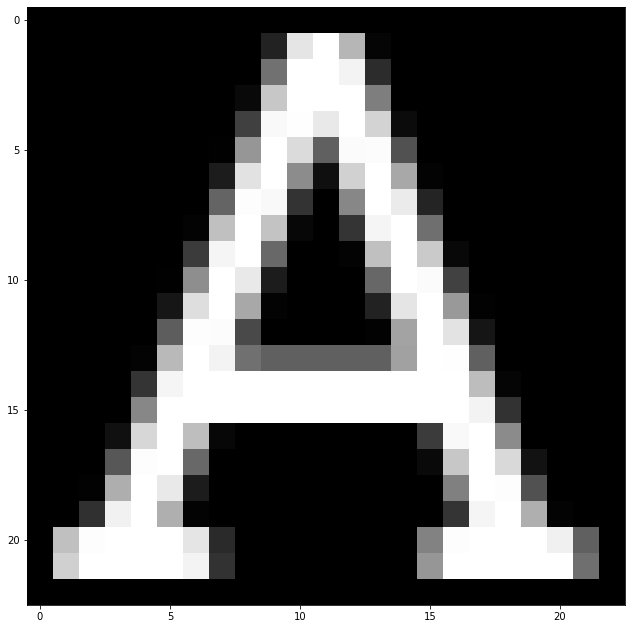

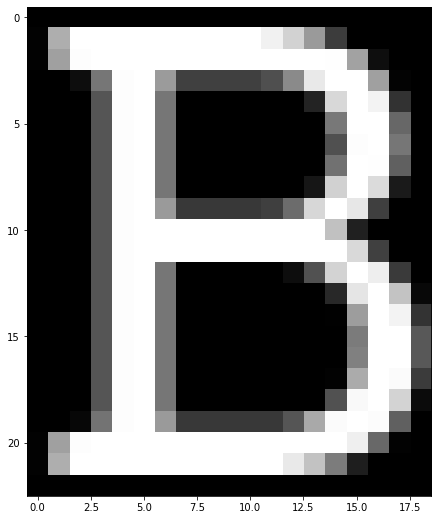

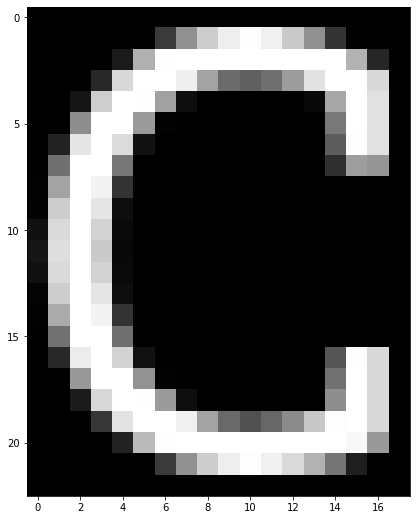

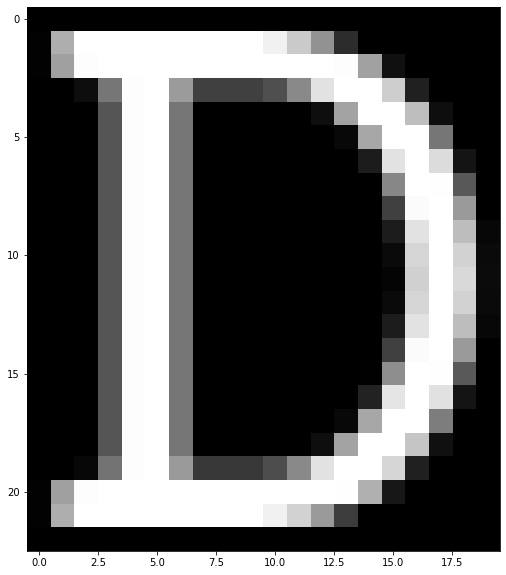

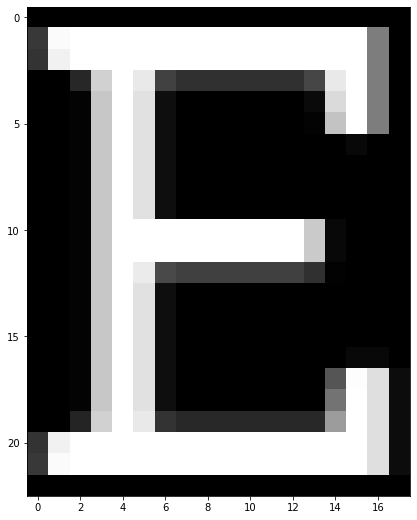

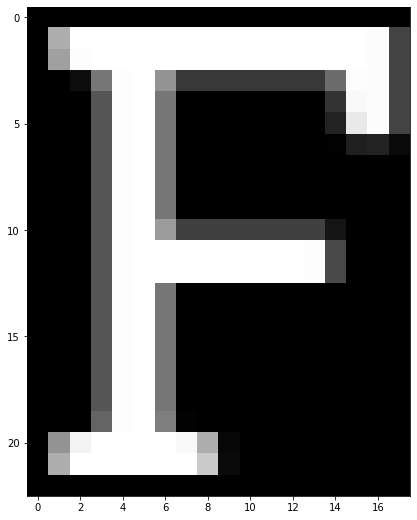

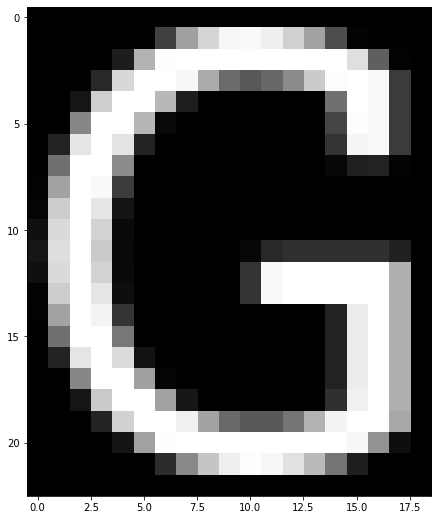

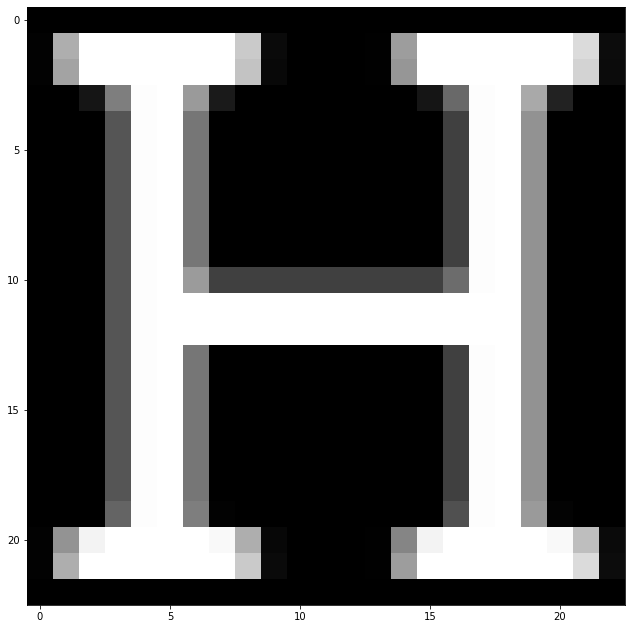

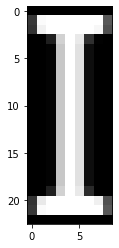

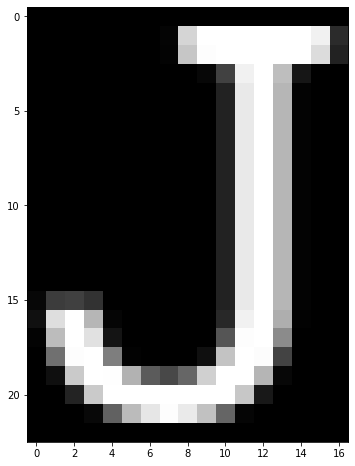

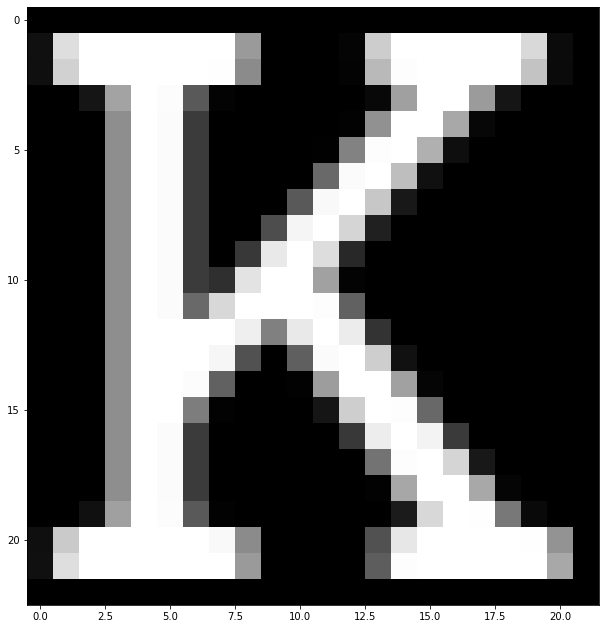

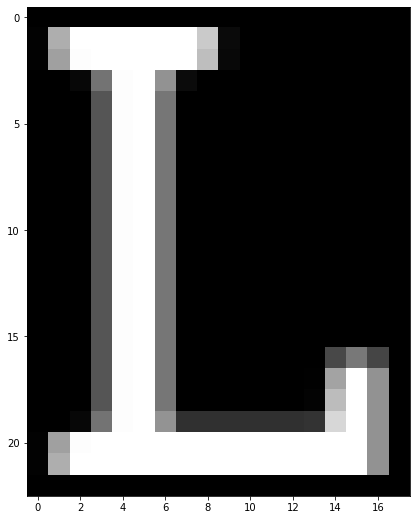

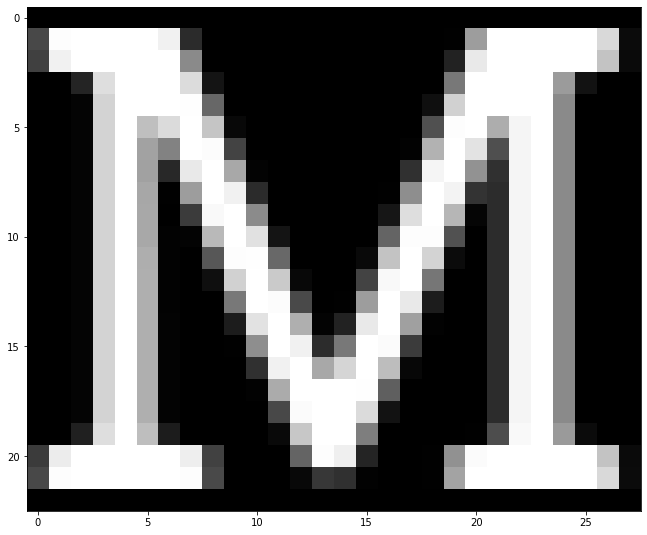

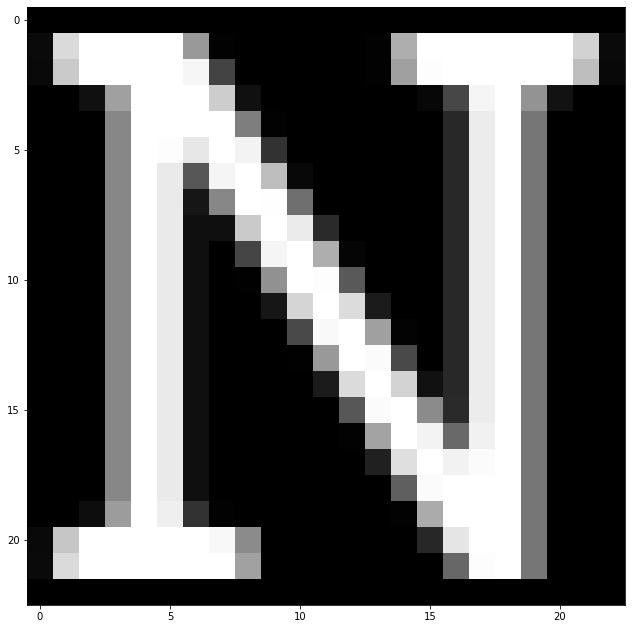

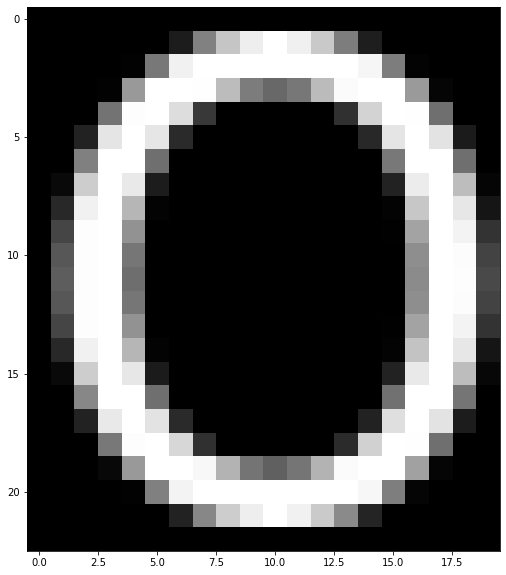

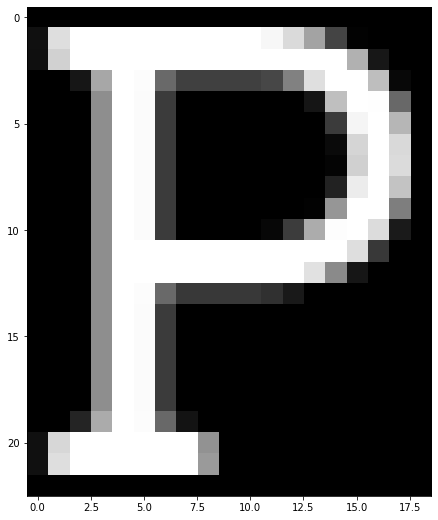

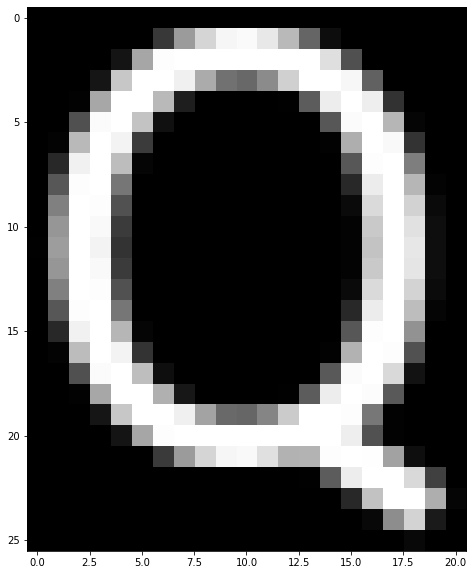

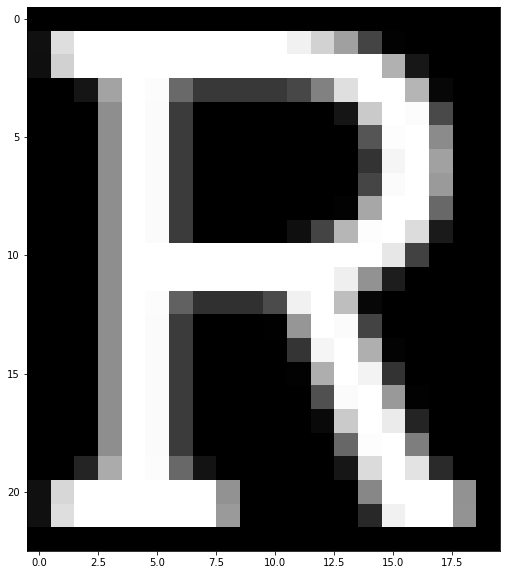

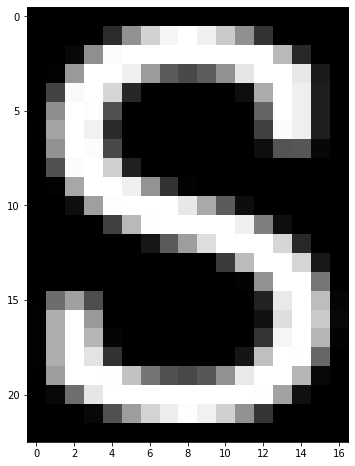

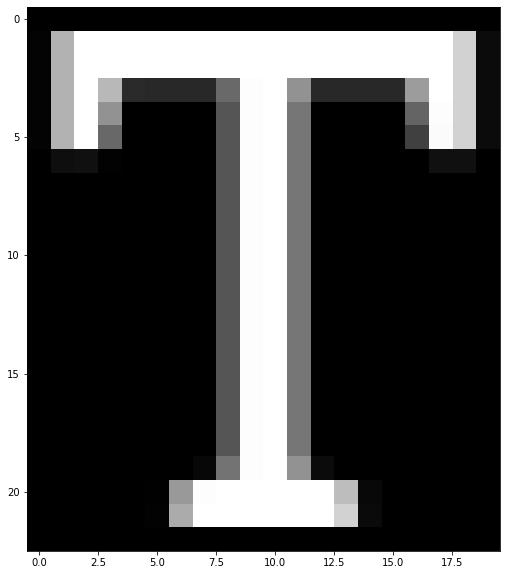

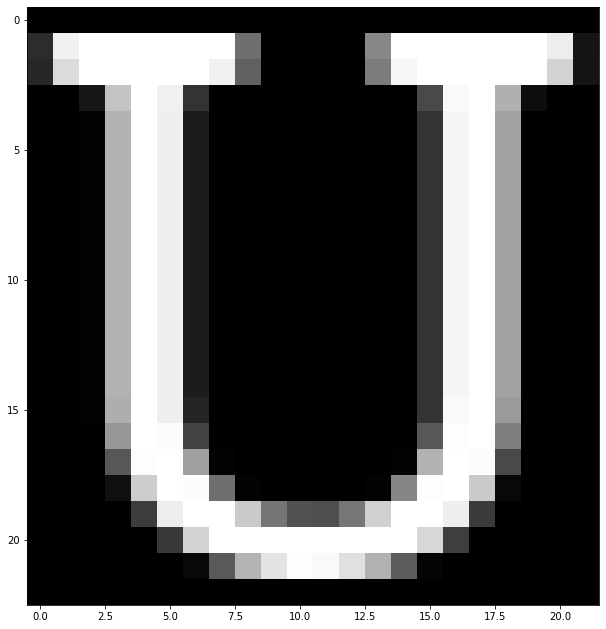

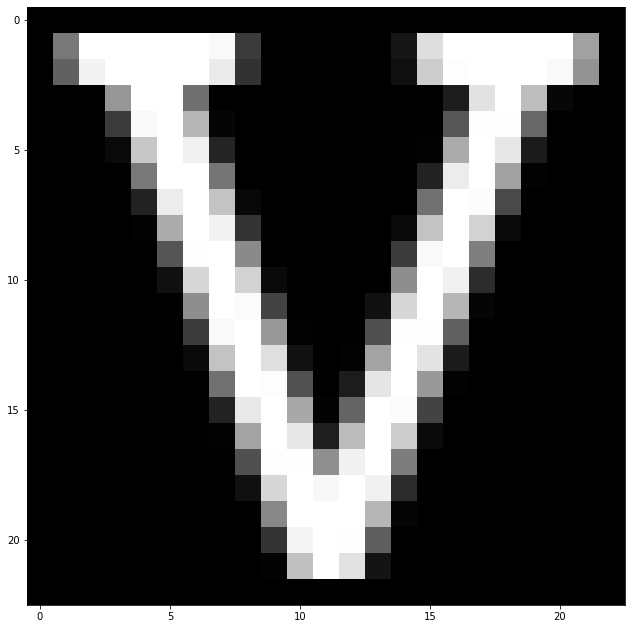

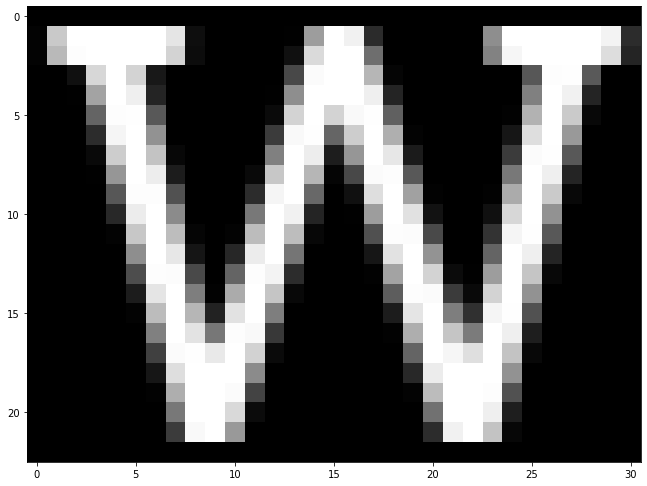

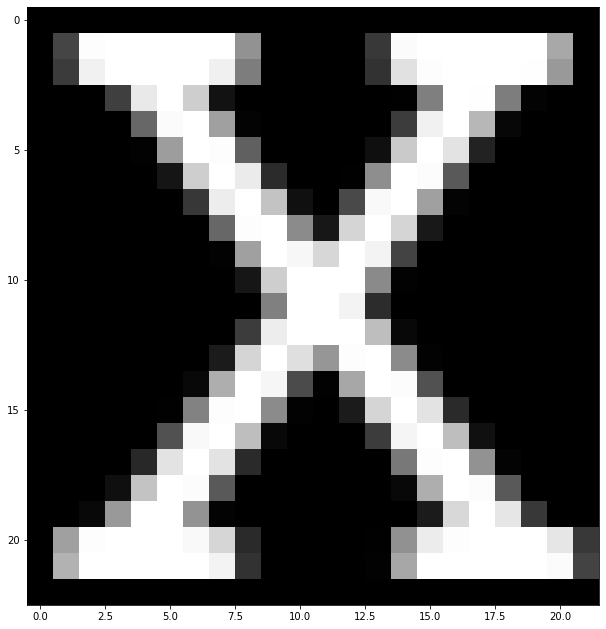

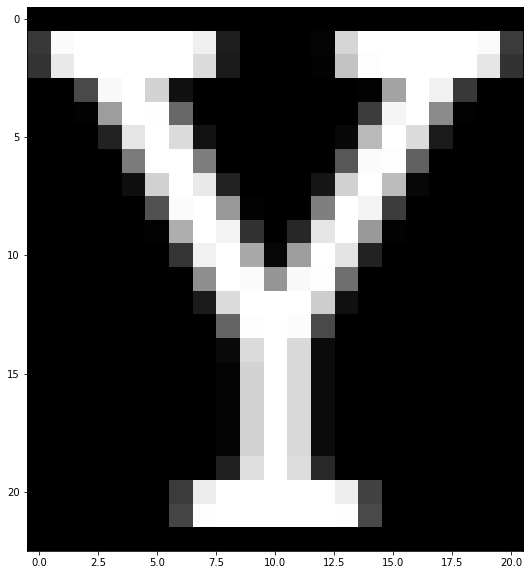

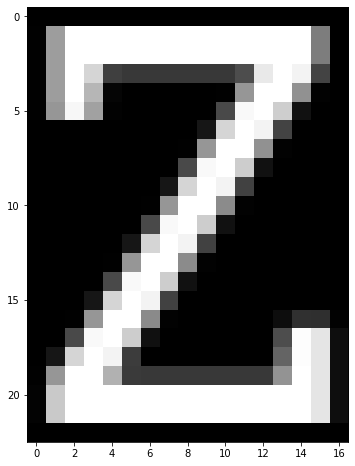

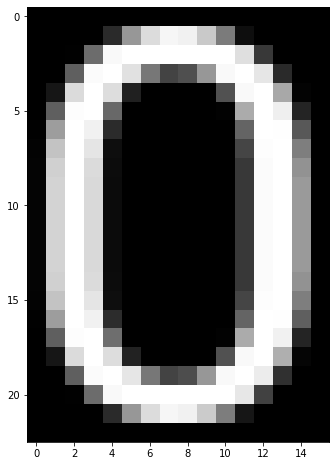

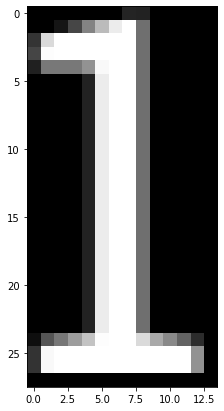

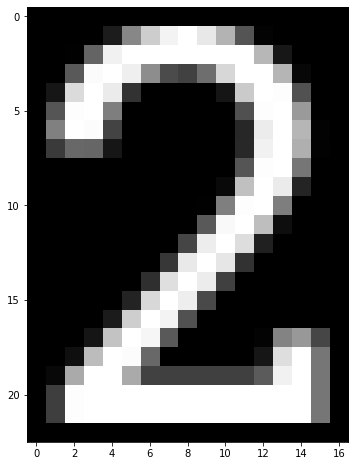

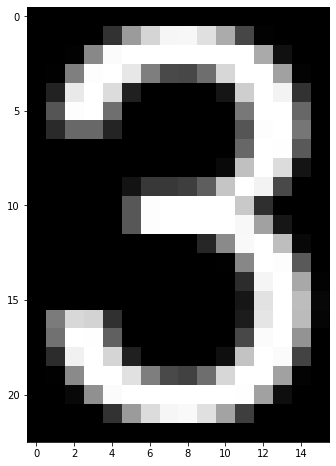

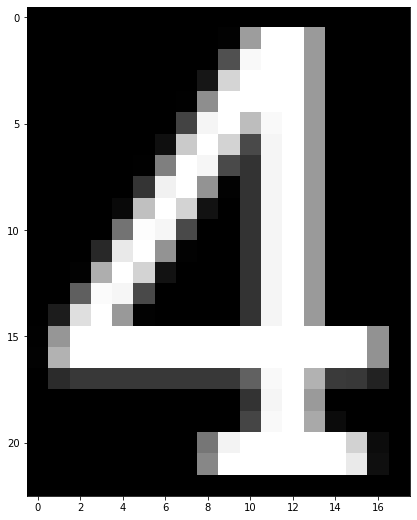

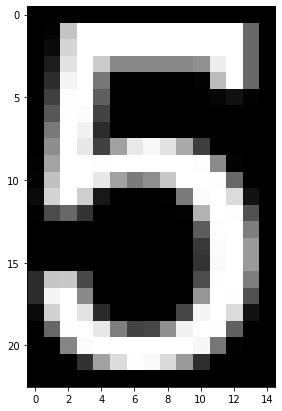

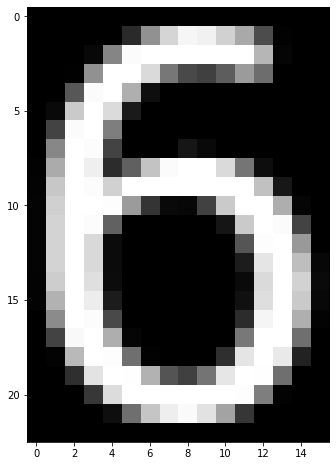

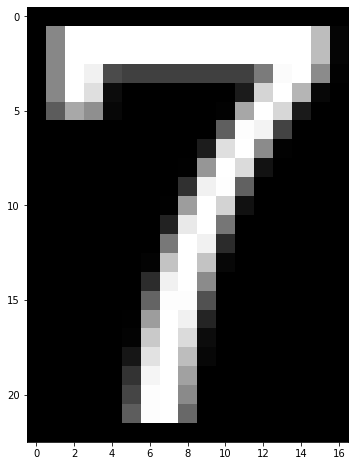

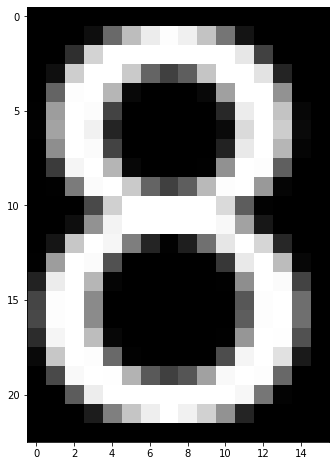

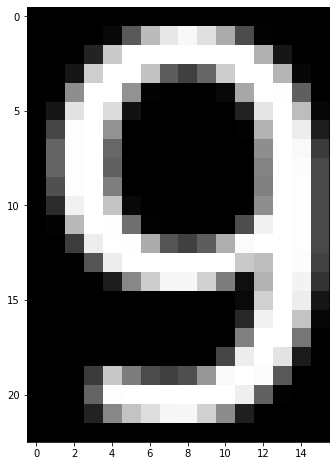

In [12]:
chars = ocr.fonts_manager.get_chars_img('roboto_slab')
for char in chars:
    show_img(char, scale=2)

## Przykład działania 

### Sans serif

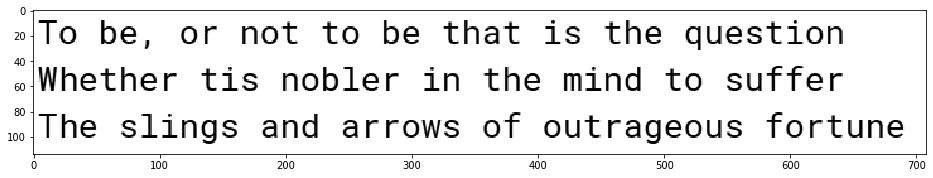

In [13]:
img_path = 'fonts/roboto_mono/short.png'
show_img(read_img(img_path, invert=False), scale=7)

In [14]:
text = ocr.read_text(img_path, 'roboto_mono')
print(text)

To be or not to be that is the question
Whether tis nobler in the mind to suffer
The slings and arro s of outrageous fortune


In [15]:
print_count(text)

Found  4 occurrences of character a
Found  3 occurrences of character b
Found  2 occurrences of character d
Found  12 occurrences of character e
Found  4 occurrences of character f
Found  2 occurrences of character g
Found  6 occurrences of character h
Found  6 occurrences of character i
Found  2 occurrences of character l
Found  1 occurrences of character m
Found  8 occurrences of character n
Found  12 occurrences of character o
Found  1 occurrences of character q
Found  8 occurrences of character r
Found  8 occurrences of character s
Found  12 occurrences of character t
Found  5 occurrences of character u
Found  2 occurrences of character T
Found  1 occurrences of character W
No other characters found


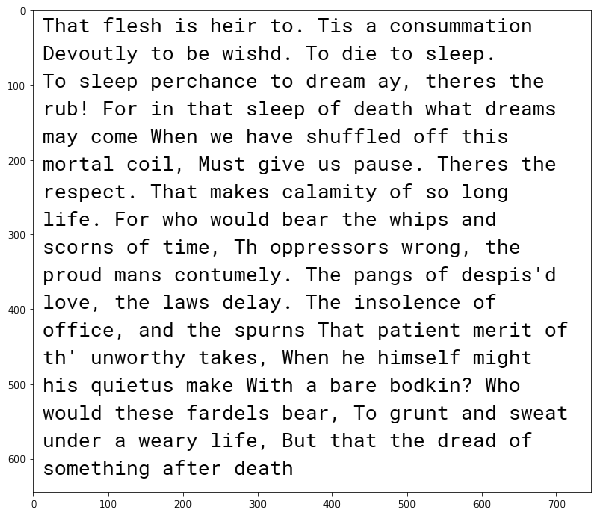

In [16]:
img_path = 'fonts/roboto_mono/long.png'
show_img(read_img(img_path, invert=False), scale=60)

In [17]:
text = ocr.read_text(img_path, 'roboto_mono')
print(text)

That flesh is heir to Tis a consummation
Devoutly to be ishd To die to sleep
To sleep perchance to dream ay theres the
rub For in that sleep of death hat dreams
may come When e have shuffled off this
mortal coil Must give us pause Theres the
respect That makes calamity of so long
life For ho ould bear the hips and
scorns of time Th oppressors rong the
proud mans contumely The pangs of despis d
love the la s delay The insolence of
office and the spurns That patient merit of
th un orthy takes When he himself might
his quietus make With a bare bodkin Who
ould these fardels bear To grunt and s eat
under a eary life But that the dread of
something after death


In [18]:
print_count(text)

Found  41 occurrences of character a
Found  6 occurrences of character b
Found  11 occurrences of character c
Found  21 occurrences of character d
Found  71 occurrences of character e
Found  19 occurrences of character f
Found  7 occurrences of character g
Found  41 occurrences of character h
Found  27 occurrences of character i
Found  4 occurrences of character k
Found  21 occurrences of character l
Found  17 occurrences of character m
Found  24 occurrences of character n
Found  41 occurrences of character o
Found  14 occurrences of character p
Found  1 occurrences of character q
Found  28 occurrences of character r
Found  41 occurrences of character s
Found  46 occurrences of character t
Found  18 occurrences of character u
Found  4 occurrences of character v
Found  8 occurrences of character y
Found  1 occurrences of character B
Found  1 occurrences of character D
Found  2 occurrences of character F
Found  1 occurrences of character M
Found  11 occurrences of character T
Found  4 oc

#### Czas wykonania: 

In [19]:
%%timeit -n 2 -r 1
ocr.read_text(img_path, 'roboto_mono')

4.27 s ± 0 ns per loop (mean ± std. dev. of 1 run, 2 loops each)


### Serif

In [20]:
ocr = Ocr()

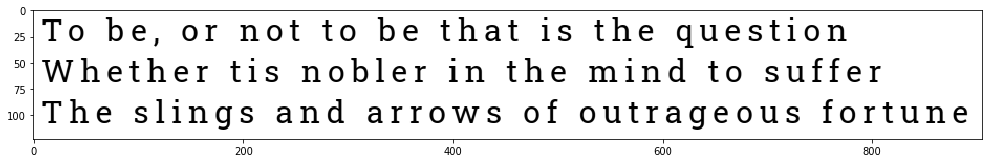

In [21]:
img_path = 'fonts/roboto_slab/short.png'
show_img(read_img(img_path, invert=False), scale=7)

In [22]:
text = ocr.read_text(img_path, 'roboto_slab', space_threshold=1.0)
print(text)

To be or not o be tha is the question
Whe her tis nob erinthe rm nd o sufMer
The s ngs and arro ws of outrageous fortune


In [23]:
print_count(text)

Found  4 occurrences of character a
Found  3 occurrences of character b
Found  2 occurrences of character d
Found  12 occurrences of character e
Found  3 occurrences of character f
Found  2 occurrences of character g
Found  6 occurrences of character h
Found  4 occurrences of character i
Found  1 occurrences of character m
Found  8 occurrences of character n
Found  12 occurrences of character o
Found  1 occurrences of character q
Found  9 occurrences of character r
Found  8 occurrences of character s
Found  8 occurrences of character t
Found  5 occurrences of character u
Found  1 occurrences of character w
Found  1 occurrences of character M
Found  2 occurrences of character T
Found  1 occurrences of character W
No other characters found


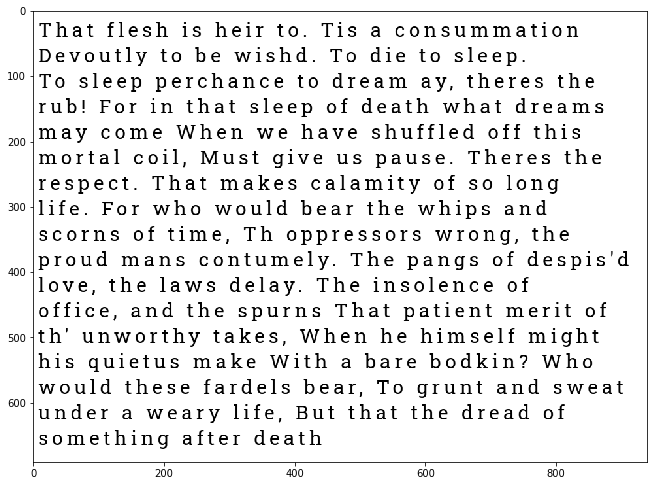

In [24]:
img_path = 'fonts/roboto_slab/long.png'
show_img(read_img(img_path, invert=False), scale=60)

In [25]:
text = ocr.read_text(img_path, 'roboto_slab')
print(text)

Thatf eshis he rto Tis a cons rmrma on
Devout1yto be wishd To dieto s eep
To sleep perchanceto drearm ay theres he
rub Forintha sleep of death what drea ms
rmay co me Ahen we have shuff1ed offthis
rmorta col IMus give us pause Theresthe
respect That makes ca a mity of solong
life For who wou1d bearthe whips and
scorns oft rme Th oppressors wrong he
proud mans conturmely The pangs of desp s d
love thelaws de1ay Theinsolence of
office andthe spurns That patientrmert of
th nworthytakes When he h mself might
h s q et s make W h a bare bodkin Aho
wo ld hesefarde1s bear To gr n and sweat
nder a wearylife But latthe dread of
so meling after death


In [26]:
print_count(text)

Found  41 occurrences of character a
Found  6 occurrences of character b
Found  11 occurrences of character c
Found  21 occurrences of character d
Found  71 occurrences of character e
Found  19 occurrences of character f
Found  7 occurrences of character g
Found  39 occurrences of character h
Found  17 occurrences of character i
Found  4 occurrences of character k
Found  14 occurrences of character l
Found  17 occurrences of character m
Found  24 occurrences of character n
Found  41 occurrences of character o
Found  14 occurrences of character p
Found  1 occurrences of character q
Found  36 occurrences of character r
Found  41 occurrences of character s
Found  36 occurrences of character t
Found  11 occurrences of character u
Found  4 occurrences of character v
Found  12 occurrences of character w
Found  8 occurrences of character y
Found  2 occurrences of character A
Found  1 occurrences of character B
Found  1 occurrences of character D
Found  2 occurrences of character F
Found  1 oc

#### Czas wykonania

In [27]:
%%timeit -n 2 -r 1
ocr.read_text(img_path, 'roboto_slab')

6.96 s ± 0 ns per loop (mean ± std. dev. of 1 run, 2 loops each)


## Testy poprawnościowe, miara poprawności działania programu

Do przetestowania programu przygotowałem dwa fragmenty dramatu *Hamlet* w oryginale. 

In [28]:
tests = {
    'short': 
'''
To be, or not to be that is the question
Whether tis nobler in the mind to suffer
The slings and arrows of outrageous fortune
''', 'long':
'''
That flesh is heir to. Tis a consummation  
Devoutly to be wishd. To die to sleep.
To sleep perchance to dream ay, theres the 
rub! For in that sleep of death what dreams 
may come When we have shuffled off this 
mortal coil, Must give us pause. Theres the 
respect. That makes calamity of so long
life. For who would bear the whips and 
scorns of time, Th oppressors wrong, the 
proud mans contumely. The pangs of despis'd 
love, the laws delay. The insolence of 
office, and the spurns That patient merit of 
th' unworthy takes, When he himself might 
his quietus make With a bare bodkin? Who 
would these fardels bear, To grunt and sweat 
under a weary life, But that the dread of 
something after death
'''
}

Jako miarę poprawności działania programu przyjąłem odległość edycyjną (Levenshteina), oraz stosunek odległości do długości tekstu (wyrażony w procentach). Pozwala to w mojej ocenie pokazać dokładność działania przyogotowanego algorytmu OCR w sposób miarodajny względem popełnionego błędu w odczycie, jak i ułatwiający porównanie niezależnie od długości przygotowanego testu.

In [29]:
def test(img_path, font_name, text, o=Ocr()):
    res = o.read_text(img_path, font_name)
    dist = editdistance.eval(res, text)
    percent = dist * 100 / len(text)
    return dist, percent

### Sans serif

Test krótki

In [30]:
sans_short_dist, sans_short_percent = test('fonts/roboto_mono/short.png', 'roboto_mono', tests['short'])
print('Edit distance:', sans_short_dist, '\nEdit distance to text len:', round(sans_short_percent,2), '%')

Edit distance: 4 
Edit distance to text len: 3.15 %


Test długi

In [31]:
sans_long_dist, sans_long_percent = test('fonts/roboto_mono/long.png', 'roboto_mono', tests['long'])
print('Edit distance:', sans_long_dist, '\nEdit distance to text len:', round(sans_long_percent,2), '%')

Edit distance: 50 
Edit distance to text len: 7.06 %


### Serif

Test krótki

In [32]:
serif_short_dist, serif_short_percent = test('fonts/roboto_slab/short.png', 'roboto_slab', tests['short'], ocr)
print('Edit distance:', serif_short_dist, '\nEdit distance to text len:', round(serif_short_percent,2), '%')

Edit distance: 19 
Edit distance to text len: 14.96 %


Test długi

In [33]:
serif_long_dist, serif_long_percent = test('fonts/roboto_slab/long.png', 'roboto_slab', tests['long'], ocr)
print('Edit distance:', serif_long_dist, '\nEdit distance to text len:', round(serif_long_percent,2), '%')

Edit distance: 111 
Edit distance to text len: 15.68 %


### Wnioski

Zauważyć możemy spory spadek dokładności działania algorytmu dla testu wykorzystującego czcionkę szeryfową.  

## Znaki interpunkcyjne

W poprzednich próbach algorytmu program uruchomiony był w trybie rozpoznającym małe i duże litery alfabetu łacińskiego, oraz cyfry. Przetestujmy go w wersji rozpoznającej dodatkowo znaki interpunkcyjne: ", . ; ? !". 

In [34]:
ocr = Ocr(stop=True)

Obsługiwane znaki interpunkcyjne:

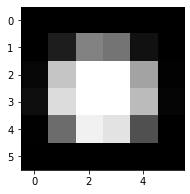

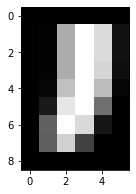

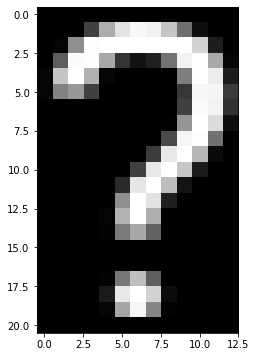

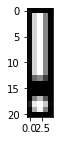

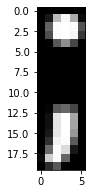

In [35]:
chars = ocr.fonts_manager.get_chars_img('roboto_mono')
for char in chars[-5:]:
    show_img(char, scale=2)

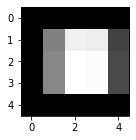

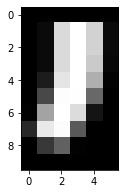

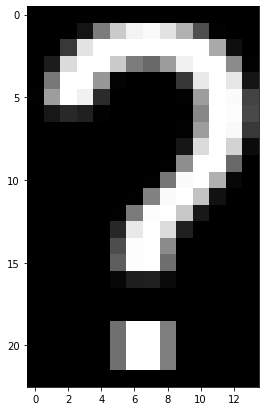

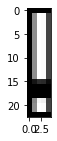

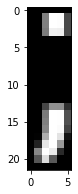

In [36]:
chars = ocr.fonts_manager.get_chars_img('roboto_slab')
for char in chars[-5:]:
    show_img(char, scale=2)

### Sans serif

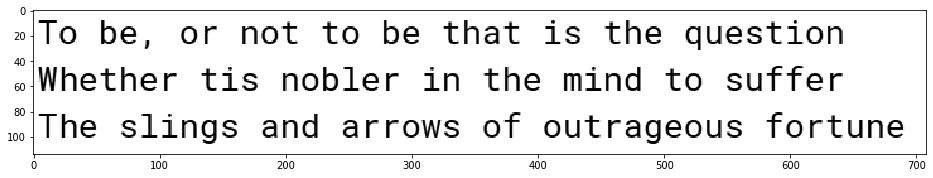

In [37]:
img_path = 'fonts/roboto_mono/short.png'
show_img(read_img(img_path, invert=False), scale=7)

In [38]:
text = ocr.read_text(img_path, 'roboto_mono')
print(text)

To!be or no.t .to!be.t!ha.t is.t!he ques.tion
,.Whe.t!her .tis nobler in.t!he mind.to suffer
The slings and arro s of ou.trageous for.tune


In [39]:
print_count(text, stop=True)

Found  4 occurrences of character a
Found  3 occurrences of character b
Found  2 occurrences of character d
Found  12 occurrences of character e
Found  4 occurrences of character f
Found  2 occurrences of character g
Found  6 occurrences of character h
Found  6 occurrences of character i
Found  2 occurrences of character l
Found  1 occurrences of character m
Found  8 occurrences of character n
Found  12 occurrences of character o
Found  1 occurrences of character q
Found  8 occurrences of character r
Found  8 occurrences of character s
Found  12 occurrences of character t
Found  5 occurrences of character u
Found  2 occurrences of character T
Found  1 occurrences of character W
Found  13 occurrences of character .
Found  1 occurrences of character ,
Found  6 occurrences of character !
No other characters found


In [40]:
sans_short_stop_dist, sans_short_stop_percent = test('fonts/roboto_mono/short.png', 'roboto_mono', tests['short'], ocr)
print('Edit distance:', sans_short_stop_dist, '\nEdit distance to text len:', round(sans_short_stop_percent,2), '%')

Edit distance: 24 
Edit distance to text len: 18.9 %


In [41]:
print(round(sans_short_percent, 2), '% w wersji bez znaków interpunkcyjnych')
print('Zmiana', round(sans_short_stop_percent * 100 / sans_short_percent,2), '%')

3.15 % w wersji bez znaków interpunkcyjnych
Zmiana 600.0 %


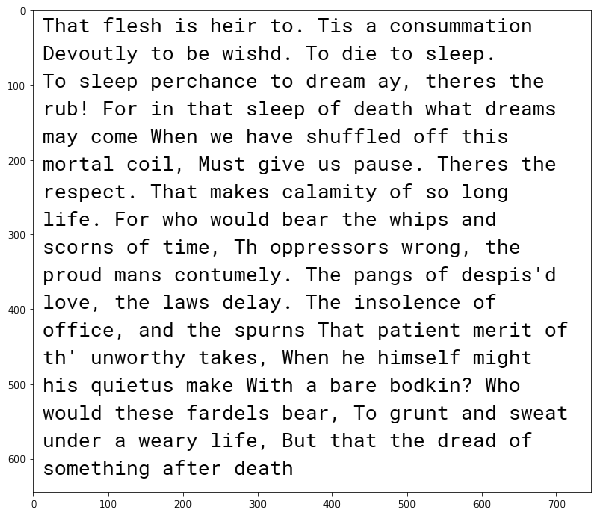

In [42]:
img_path = 'fonts/roboto_mono/long.png'
show_img(read_img(img_path, invert=False), scale=60)

In [43]:
text = ocr.read_text(img_path, 'roboto_mono')
print(text)

That flesh is!heir to Tis a consummation
!Devoutly to!be ishd To die to sleep
To sleep!perchance to dream ay t!heres t!he
rub For in t!hat sleep of deat!h !hat dreams
may come,When e!have shuffled off t!his
mortal coil !.Must ive us ause Theres t!he
g !p
respect That makes calamity of so long
life For !ho ould!bear t!he !hips and
scorns of time Th oppressors rong t!he
!proud mans contumely The!pangs of despis d
love t!he la s delay The insolence of
office and t!he spurns That!patient merit of
t!h un ort!hy takes ,When!he!himself might
!his uietus make,.Wit!h a!bare!bodkin?,Who
q
ould t!hese fardels!bear To grunt and s eat
under a eary life !But t!hat t!he dread of
somet!hing after deat!h


In [44]:
print_count(text, stop=True)

Found  41 occurrences of character a
Found  6 occurrences of character b
Found  11 occurrences of character c
Found  21 occurrences of character d
Found  71 occurrences of character e
Found  19 occurrences of character f
Found  7 occurrences of character g
Found  41 occurrences of character h
Found  27 occurrences of character i
Found  4 occurrences of character k
Found  21 occurrences of character l
Found  17 occurrences of character m
Found  24 occurrences of character n
Found  41 occurrences of character o
Found  14 occurrences of character p
Found  1 occurrences of character q
Found  28 occurrences of character r
Found  41 occurrences of character s
Found  46 occurrences of character t
Found  18 occurrences of character u
Found  4 occurrences of character v
Found  8 occurrences of character y
Found  1 occurrences of character B
Found  1 occurrences of character D
Found  2 occurrences of character F
Found  1 occurrences of character M
Found  11 occurrences of character T
Found  4 oc

In [45]:
sans_long_stop_dist, sans_long_stop_percent = test('fonts/roboto_mono/long.png', 'roboto_mono', tests['long'], ocr)
print('Edit distance:', sans_long_stop_dist, '\nEdit distance to text len:', round(sans_long_stop_percent,2), '%')

Edit distance: 97 
Edit distance to text len: 13.7 %


In [46]:
print(round(sans_long_percent, 2), '% w wersji bez znaków interpunkcyjnych')
print('Zmiana', round(sans_long_stop_percent * 100 / sans_long_percent,2), '%')

7.06 % w wersji bez znaków interpunkcyjnych
Zmiana 194.0 %


### Serif

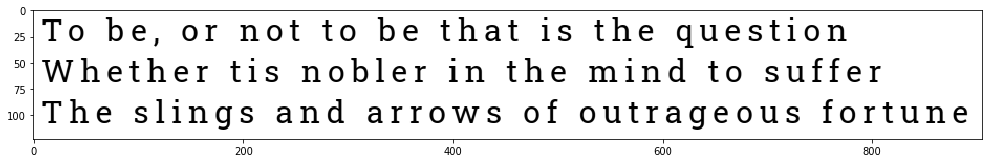

In [47]:
img_path = 'fonts/roboto_slab/short.png'
show_img(read_img(img_path, invert=False), scale=7)

In [48]:
text = ocr.read_text(img_path, 'roboto_slab')
print(text)

.To.be or not,o.bet.ha ist.he question
..W.he.hertis no.b.erint.herm nd,o sufMer
.T.he s.,n.gs an.d arro.ws of outra.geousfortune


In [49]:
print_count(text, stop=True)

Found  4 occurrences of character a
Found  3 occurrences of character b
Found  2 occurrences of character d
Found  12 occurrences of character e
Found  3 occurrences of character f
Found  2 occurrences of character g
Found  6 occurrences of character h
Found  4 occurrences of character i
Found  1 occurrences of character m
Found  8 occurrences of character n
Found  12 occurrences of character o
Found  1 occurrences of character q
Found  9 occurrences of character r
Found  8 occurrences of character s
Found  8 occurrences of character t
Found  5 occurrences of character u
Found  1 occurrences of character w
Found  1 occurrences of character M
Found  2 occurrences of character T
Found  1 occurrences of character W
Found  19 occurrences of character .
Found  3 occurrences of character ,
No other characters found


In [50]:
serif_short_stop_dist, serif_short_stop_percent = test('fonts/roboto_slab/short.png', 'roboto_slab', tests['short'], ocr)
print('Edit distance:', serif_short_stop_dist, '\nEdit distance to text len:', round(serif_short_stop_percent,2), '%')

Edit distance: 36 
Edit distance to text len: 28.35 %


In [51]:
print(round(serif_short_percent, 2), '% w wersji bez znaków interpunkcyjnych')
print('Zmiana', round(serif_short_stop_percent * 100 / serif_short_percent,2), '%')

14.96 % w wersji bez znaków interpunkcyjnych
Zmiana 189.47 %


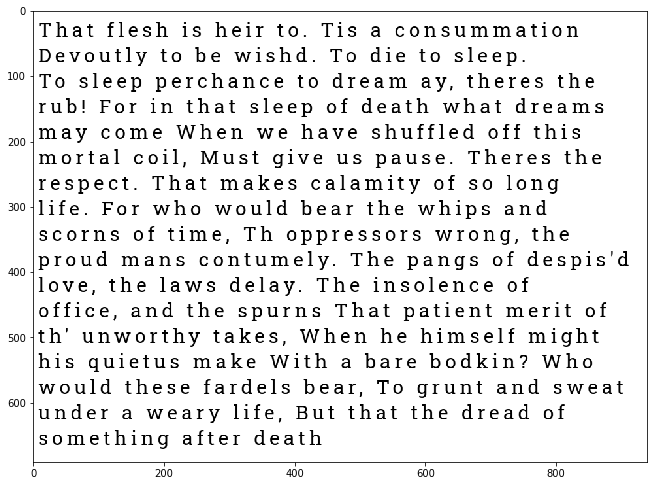

In [52]:
img_path = 'fonts/roboto_slab/long.png'
show_img(read_img(img_path, invert=False), scale=60)

In [53]:
text = ocr.read_text(img_path, 'roboto_slab')
print(text)

.Thatf eshis he rto .Tis a cons.rmrma.on
.Devout1yto be.wishd .To dieto s eep
.To sleep perchanceto drearm a.y theres.he
rub .Forintha sleep of death.what drea ms
rma.y co me..Ahen we have shuff1ed offthis
rmorta col .I.Mus give us pause .Theresthe
respect .That,makes ca a mit.y of solong
life .For.who.wou1.d bearthe.whips and
scorns oft rme .Th oppressors.wrong .he
proud.mans conturmel.y .The pangs of desp s d
love thelaws de1a.y .Theinsolence of
office andthe spurns.That patientrmert of
th .nworth.ytakes ..When he h.mself.might
h s q .et.s,make..W.h a bare bodkin?..A.ho
.wo.ld.hesefarde1s bear .To gr.n and s.weat
.nder a.wear.ylife .But.latthe dread of
so meling after death


In [54]:
print_count(text, stop=True)

Found  41 occurrences of character a
Found  6 occurrences of character b
Found  11 occurrences of character c
Found  21 occurrences of character d
Found  71 occurrences of character e
Found  19 occurrences of character f
Found  7 occurrences of character g
Found  39 occurrences of character h
Found  17 occurrences of character i
Found  4 occurrences of character k
Found  14 occurrences of character l
Found  17 occurrences of character m
Found  24 occurrences of character n
Found  41 occurrences of character o
Found  14 occurrences of character p
Found  1 occurrences of character q
Found  36 occurrences of character r
Found  41 occurrences of character s
Found  36 occurrences of character t
Found  11 occurrences of character u
Found  4 occurrences of character v
Found  12 occurrences of character w
Found  8 occurrences of character y
Found  2 occurrences of character A
Found  1 occurrences of character B
Found  1 occurrences of character D
Found  2 occurrences of character F
Found  1 oc

In [55]:
serif_long_stop_dist, serif_long_stop_percent = test('fonts/roboto_slab/long.png', 'roboto_slab', tests['long'], ocr)
print('Edit distance:', serif_long_stop_dist, '\nEdit distance to text len:', round(serif_long_stop_percent,2), '%')

Edit distance: 159 
Edit distance to text len: 22.46 %


In [56]:
print(round(serif_long_percent, 2), '% w wersji bez znaków interpunkcyjnych')
print('Zmiana', round(serif_long_stop_percent * 100 / serif_long_percent,2), '%')

15.68 % w wersji bez znaków interpunkcyjnych
Zmiana 143.24 %


### Wnioski

Rozpoznawanie znaków interpunkcyjnych jest dużym wyzwaniem dla programu i znacząco obniża jego skuteczność dla obu typów czcionek użytych do celów testowych. Analizując uzyskane wyniki rozpoznawania tekstu zauważyć możemy, że bardzo wiele znaków błędnie zakwalifikowanych zostało jako kropka, lub przecinek. Dzieje się tak dlatego, że znaki te są małe i jako jeden z nich zakwalifikowany może zostać fragment innego znaku. 

Sprzeczne z moją początkową intuicją były niższe przyrosty niezgodności dla czcionki szeryfowej, co tłumaczę już stosunkowo wysokim progiem z jakiego startowała. 

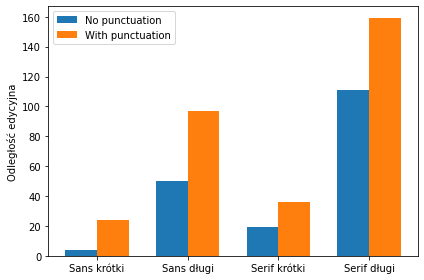

In [57]:
labels = ['Sans krótki', 'Sans długi', 'Serif krótki', 'Serif długi']
before = [sans_short_dist, sans_long_dist, serif_short_dist, serif_long_dist]
after = [sans_short_stop_dist, sans_long_stop_dist, serif_short_stop_dist, serif_long_stop_dist]

show_bar_plot(before, after, labels, 'No punctuation', 'With punctuation', 'Odległość edycyjna')

## Obraz z szumem cyfrowym

Program wyposażony został w funkcję usuwającą szumy w przetwarzanym obrazie za pomocą dekompozycji SVD i aproksymacji *low rank approx*.

Poniższe obrazy testowe przygotowane zostały poprzez dodanie sztucznego szumu cyfrowego za pomocą narzędzia zewnętrznego. 

In [58]:
ocr = Ocr()

### Test krótki, szum cyfrowy

### Sans serif

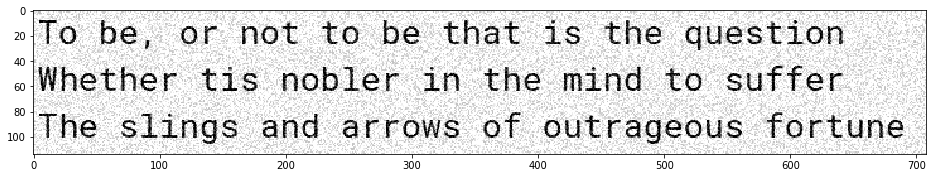

In [59]:
img_path = 'fonts/roboto_mono/short_noise.png'
show_img(read_img(img_path, invert=False), scale=7)

In [60]:
text = ocr.read_text(img_path, 'roboto_mono')
print(text)

To be or not to be that is the question
Whet er tis noble in the mind to suffer
The slings and arro s of outrageous fortune


In [61]:
print_count(text)

Found  4 occurrences of character a
Found  3 occurrences of character b
Found  2 occurrences of character d
Found  12 occurrences of character e
Found  4 occurrences of character f
Found  2 occurrences of character g
Found  5 occurrences of character h
Found  6 occurrences of character i
Found  2 occurrences of character l
Found  1 occurrences of character m
Found  8 occurrences of character n
Found  12 occurrences of character o
Found  1 occurrences of character q
Found  7 occurrences of character r
Found  8 occurrences of character s
Found  12 occurrences of character t
Found  5 occurrences of character u
Found  2 occurrences of character T
Found  1 occurrences of character W
No other characters found


In [62]:
sans_short_noise_dist, percent = test('fonts/roboto_mono/short_noise.png', 'roboto_mono', tests['short'])
print('Edit distance:', sans_short_noise_dist, '\nEdit distance to text len:', round(percent,2), '%')

Edit distance: 6 
Edit distance to text len: 4.72 %


In [63]:
print(round(sans_short_percent, 2), '% w wersji bez szumu')
print('Zmiana', round(percent * 100 / sans_short_percent,2), '%')

3.15 % w wersji bez szumu
Zmiana 150.0 %


### Serif

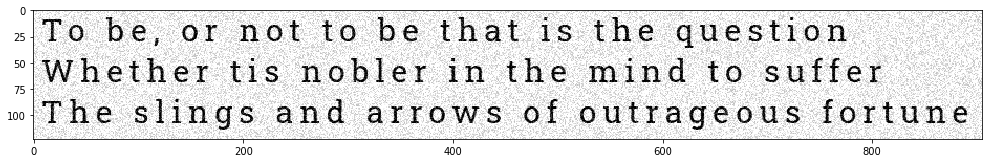

In [64]:
img_path = 'fonts/roboto_slab/short_noise.png'
show_img(read_img(img_path, invert=False), scale=7)

In [65]:
text = ocr.read_text(img_path, 'roboto_slab')
print(text)

To be or not o betha isthe question
Whe kertis nobHrinthermind o s fMer
The s ngs and arrows oH ou ragec sforM pe


In [66]:
print_count(text)

Found  4 occurrences of character a
Found  3 occurrences of character b
Found  1 occurrences of character c
Found  2 occurrences of character d
Found  11 occurrences of character e
Found  2 occurrences of character f
Found  2 occurrences of character g
Found  5 occurrences of character h
Found  5 occurrences of character i
Found  1 occurrences of character k
Found  1 occurrences of character m
Found  7 occurrences of character n
Found  11 occurrences of character o
Found  1 occurrences of character p
Found  1 occurrences of character q
Found  9 occurrences of character r
Found  8 occurrences of character s
Found  6 occurrences of character t
Found  2 occurrences of character u
Found  1 occurrences of character w
Found  2 occurrences of character H
Found  2 occurrences of character M
Found  2 occurrences of character T
Found  1 occurrences of character W
No other characters found


In [67]:
serif_short_noise_dist, percent = test('fonts/roboto_slab/short_noise.png', 'roboto_slab', tests['short'])
print('Edit distance:', serif_short_noise_dist, '\nEdit distance to text len:', round(percent,2), '%')

Edit distance: 28 
Edit distance to text len: 22.05 %


In [68]:
print(round(serif_short_percent, 2), '% w wersji bez szumu')
print('Zmiana', round(percent * 100 / serif_short_percent,2), '%')

14.96 % w wersji bez szumu
Zmiana 147.37 %


### Test długi, średni szum cyfrowy

### Sans serif

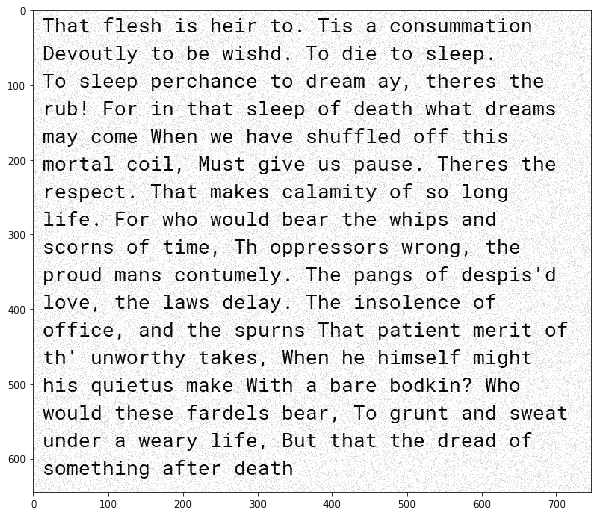

In [69]:
img_path = 'fonts/roboto_mono/long_noise1.png'
show_img(read_img(img_path, invert=False), scale=60)

In [70]:
text = ocr.read_text(img_path, 'roboto_mono')
print(text)

That flesh is hei to Tis a consummation
Devoutly to be ishd To die to sleep
To sleep pe chance to dream ay the es the
rub Fo in that sleep of death hat d eams
may come When e have shuffled off this
mortal coil Must give us pause The es the
respect That makes calamity of so long
life For ho ould bea the hips and
sco ns of time Th opp esso s rong the
proud mans contumely The pangs of despis d
love the la s delay The insolence of
office and the spu ns That patient merit of
th un orthy takes When he himself might
his quietus make With a bare bodkin Who
ould these fa dels bea To g unt and s eat
unde a eary life But that the dread of
something afte death


In [71]:
print_count(text)

Found  41 occurrences of character a
Found  6 occurrences of character b
Found  11 occurrences of character c
Found  21 occurrences of character d
Found  71 occurrences of character e
Found  19 occurrences of character f
Found  7 occurrences of character g
Found  41 occurrences of character h
Found  27 occurrences of character i
Found  4 occurrences of character k
Found  21 occurrences of character l
Found  17 occurrences of character m
Found  24 occurrences of character n
Found  41 occurrences of character o
Found  14 occurrences of character p
Found  1 occurrences of character q
Found  12 occurrences of character r
Found  41 occurrences of character s
Found  46 occurrences of character t
Found  18 occurrences of character u
Found  4 occurrences of character v
Found  8 occurrences of character y
Found  1 occurrences of character B
Found  1 occurrences of character D
Found  2 occurrences of character F
Found  1 occurrences of character M
Found  11 occurrences of character T
Found  4 oc

In [72]:
sans_long_noise1_dist, percent = test('fonts/roboto_mono/long_noise1.png', 'roboto_mono', tests['long'])
print('Edit distance:', sans_long_noise1_dist, '\nEdit distance to text len:', round(percent,2), '%')

Edit distance: 66 
Edit distance to text len: 9.32 %


In [73]:
print(round(sans_long_percent, 2), '% w wersji bez szumu')
print('Zmiana', round(percent * 100 / sans_long_percent,2), '%')

7.06 % w wersji bez szumu
Zmiana 132.0 %


### Serif

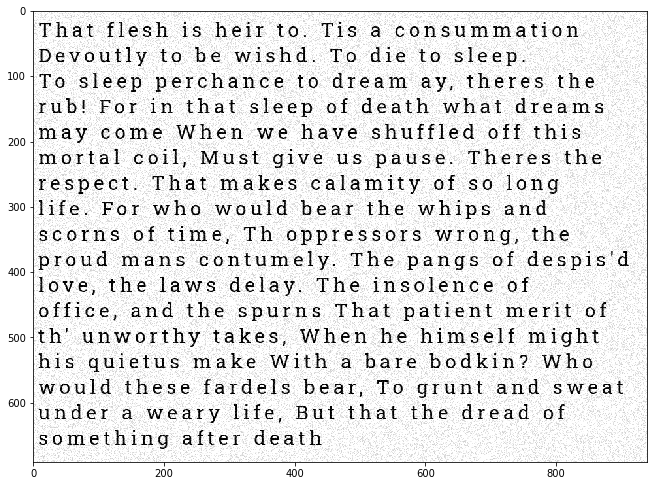

In [74]:
img_path = 'fonts/roboto_slab/long_noise1.png'
show_img(read_img(img_path, invert=False), scale=60)

In [75]:
text = ocr.read_text(img_path, 'roboto_slab')
print(text)

Tlatf eshis he rtc T s a ons rmrma on
Devout1yto be ishd To oieto s eep
To sleep perchanceto orea m ay theres he
rub Fcrinthat sleep ot death hat dr a ms
rmay corme Alen we have shuft1ed offthis
rmorta col IMus give us pause Theresthe
r spect That makes ca armity of solong
life For who ou1d bearthe hips and
scorns oft me Th oppressors wrong the
proud rmans contu mely The pangs of desp s o
lcve thelaws de ay Theinsolence of
office andthe spurns That patientrmert of
th nworthytakes When he himself might
h s q et make W l a bare bodkin Aho
wo ld lesetarde1s bear To gr n and s eat
noer a weary1fe But hatthe dread of
so me h ng after death


In [76]:
print_count(text)

Found  41 occurrences of character a
Found  6 occurrences of character b
Found  13 occurrences of character c
Found  17 occurrences of character d
Found  69 occurrences of character e
Found  16 occurrences of character f
Found  7 occurrences of character g
Found  37 occurrences of character h
Found  15 occurrences of character i
Found  4 occurrences of character k
Found  15 occurrences of character l
Found  17 occurrences of character m
Found  24 occurrences of character n
Found  42 occurrences of character o
Found  14 occurrences of character p
Found  1 occurrences of character q
Found  36 occurrences of character r
Found  40 occurrences of character s
Found  41 occurrences of character t
Found  11 occurrences of character u
Found  4 occurrences of character v
Found  7 occurrences of character w
Found  8 occurrences of character y
Found  2 occurrences of character A
Found  1 occurrences of character B
Found  1 occurrences of character D
Found  2 occurrences of character F
Found  1 occ

In [77]:
serif_long_noise1_dist, percent = test('fonts/roboto_slab/long_noise1.png', 'roboto_slab', tests['long'])
print('Edit distance:', serif_long_noise1_dist, '\nEdit distance to text len:', round(percent,2), '%')

Edit distance: 133 
Edit distance to text len: 18.79 %


In [78]:
print(round(serif_long_percent, 2), '% w wersji bez szumu')
print('Zmiana', round(percent * 100 / serif_long_percent,2), '%')

15.68 % w wersji bez szumu
Zmiana 119.82 %


### Test długi, duży szum cyfrowy

### Sans serif

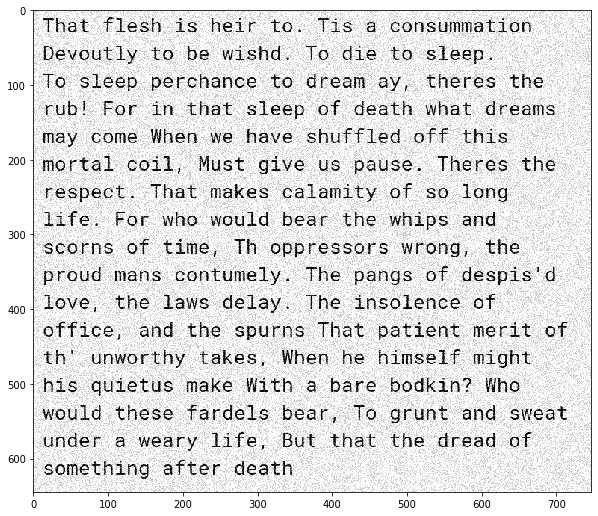

In [79]:
img_path = 'fonts/roboto_mono/long_noise2.png'
show_img(read_img(img_path, invert=False), scale=60)

In [80]:
text = ocr.read_text(img_path, 'roboto_mono')
print(text)

That flesh is hei o Tis a onsummation
D voutly to b ishd To die tc sleep
To sleep per hance to d eam ay the es the
ub For in that sleep of death hat d eams
may ccme When e ha e shuffled off thi
mo tal coil Must give us pause The es the
espe t That makes calamity of so long
life Fo ho ould bea the hips and
sco s of time Th opp esso s o g the
p oud mans o tumely Th pangs of despis d
love the la s delay The insole e of
cffice and the spu s That patient m i of
th un o thy takes Whe he himsel might
is quietus mak With a ba e bodki Who
ould these fardels bear To gru t and s eat
unde a e y life But that th d ead of
someth g after death


In [81]:
print_count(text)

Found  40 occurrences of character a
Found  6 occurrences of character b
Found  9 occurrences of character c
Found  21 occurrences of character d
Found  65 occurrences of character e
Found  18 occurrences of character f
Found  7 occurrences of character g
Found  40 occurrences of character h
Found  26 occurrences of character i
Found  4 occurrences of character k
Found  21 occurrences of character l
Found  17 occurrences of character m
Found  15 occurrences of character n
Found  38 occurrences of character o
Found  14 occurrences of character p
Found  1 occurrences of character q
Found  6 occurrences of character r
Found  40 occurrences of character s
Found  44 occurrences of character t
Found  18 occurrences of character u
Found  3 occurrences of character v
Found  8 occurrences of character y
Found  1 occurrences of character B
Found  1 occurrences of character D
Found  2 occurrences of character F
Found  1 occurrences of character M
Found  11 occurrences of character T
Found  4 occu

In [82]:
sans_long_noise2_dist, percent = test('fonts/roboto_mono/long_noise2.png', 'roboto_mono', tests['long'])
print('Edit distance:', sans_long_noise2_dist, '\nEdit distance to text len:', round(percent,2), '%')

Edit distance: 103 
Edit distance to text len: 14.55 %


In [83]:
print(round(sans_long_percent, 2), '% w wersji bez szumu')
print('Zmiana', round(percent * 100 / sans_long_percent,2), '%')

7.06 % w wersji bez szumu
Zmiana 206.0 %


### Serif

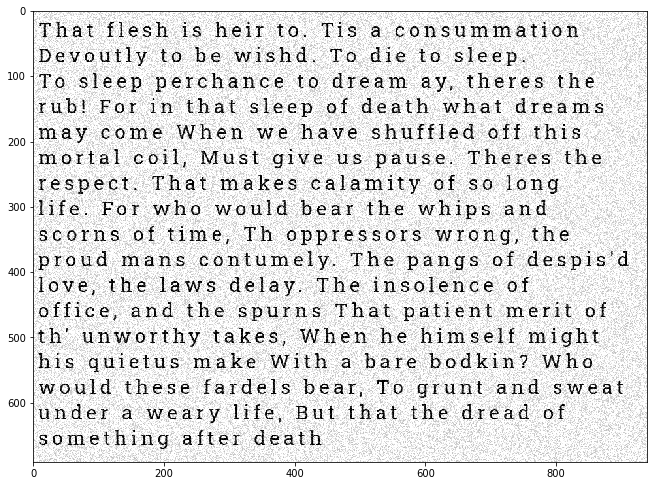

In [84]:
img_path = 'fonts/roboto_slab/long_noise2.png'
show_img(read_img(img_path, invert=False), scale=60)

In [85]:
text = ocr.read_text(img_path, 'roboto_slab')
print(text)

Tla f eshis he r c T a cons mrma on
Devcut yto be ishd To dieto s eep
To sleep perchanceto drearm ay theres he
rub Fcrintha sleep ot death what drea ms
rmay ccne W en we have s uft1ed cffthis
rmorta co 1 IMus give us pause Theresthe
respect Thatrmakes ca1armitY of solcng
life For who ou d bearthe hips and
scc ns oft rme Th oppressors wrcng he
proud rmans contu mely The pangs of desp s d
lcve helaws de1ay Theinsolence ot
oftice andthe spurns That patientrmert of
th r worthytakes When he h rmselfrmight
h s q et make W l a bare bodkin Who
wo ld le e arde s bear To gr n and s eat
under a wearylife But latthe dread of
sc meling after death


In [86]:
print_count(text)

Found  41 occurrences of character a
Found  6 occurrences of character b
Found  21 occurrences of character c
Found  21 occurrences of character d
Found  71 occurrences of character e
Found  14 occurrences of character f
Found  7 occurrences of character g
Found  34 occurrences of character h
Found  16 occurrences of character i
Found  4 occurrences of character k
Found  16 occurrences of character l
Found  16 occurrences of character m
Found  24 occurrences of character n
Found  31 occurrences of character o
Found  14 occurrences of character p
Found  1 occurrences of character q
Found  39 occurrences of character r
Found  38 occurrences of character s
Found  37 occurrences of character t
Found  12 occurrences of character u
Found  4 occurrences of character v
Found  8 occurrences of character w
Found  7 occurrences of character y
Found  1 occurrences of character B
Found  1 occurrences of character D
Found  2 occurrences of character F
Found  1 occurrences of character I
Found  1 occ

In [87]:
serif_long_noise2_dist, percent = test('fonts/roboto_slab/long_noise2.png', 'roboto_slab', tests['long'])
print('Edit distance:', serif_long_noise2_dist, '\nEdit distance to text len:', round(percent,2), '%')

Edit distance: 143 
Edit distance to text len: 20.2 %


In [88]:
print(round(serif_long_percent, 2), '% w wersji bez szumu')
print('Zmiana', round(percent * 100 / serif_long_percent,2), '%')

15.68 % w wersji bez szumu
Zmiana 128.83 %


### Wnioski

Program radzi sobie skutecznie z rozpoznawaniem obrazu o stosunkowo niskim zaszumieniu, jednak od pewnego poziomu szumu znacząco spada jego skuteczność. 

Zauważalny jest większy procentowy wzrost odległości edycyjnej w przypadku czcionki bezszeryfowej. Może to być spowodowane wyższą odległością z którą porównujemy odczyty w przypadku czcionki szeryfowej.

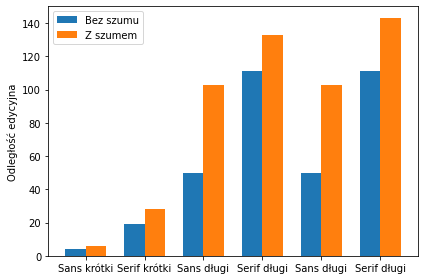

In [89]:
labels = ['Sans krótki', 'Serif krótki', 'Sans długi', 'Serif długi', 'Sans długi', 'Serif długi']
before = [sans_short_dist, serif_short_dist, sans_long_dist, serif_long_dist, sans_long_dist, serif_long_dist]
after = [sans_short_noise_dist, serif_short_noise_dist, sans_long_noise2_dist, serif_long_noise1_dist, sans_long_noise2_dist, serif_long_noise2_dist]

show_bar_plot(before, after, labels, 'Bez szumu', 'Z szumem', 'Odległość edycyjna')

## Obraz przekrzywiony

Program umożliwia odczytywanie tekstów z przekrzywionych obrazów. Podczas wczytywania obrazu rozpoznawany jest kąt przechylenia, następnie następuje jego korekcja. 

In [90]:
ocr = Ocr()

### Sans serif
### Test krótki

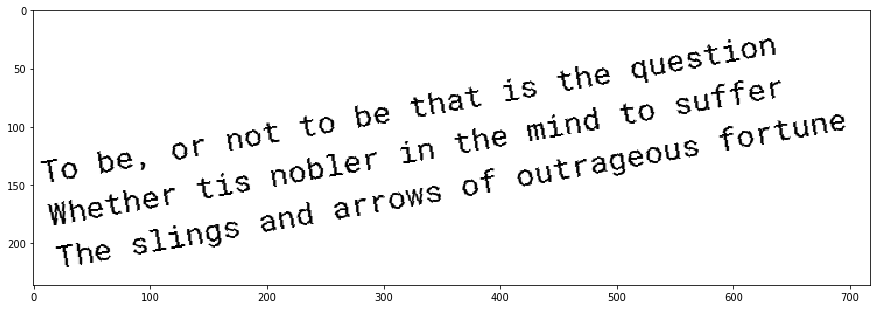

In [91]:
img_path = 'fonts/roboto_mono/short_rot10.png'
show_img(read_img(img_path, invert=False, rotate=False), scale=15)

Angle detected: -10


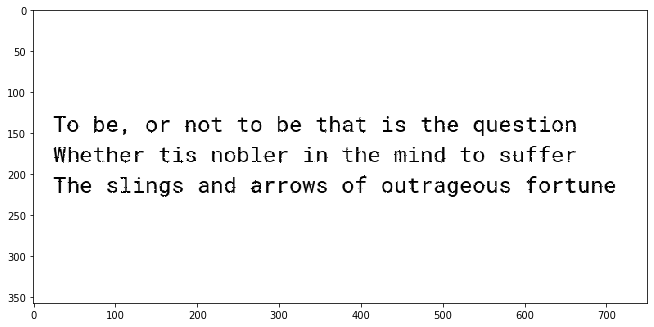

In [92]:
print('Angle detected:',detect_angle(img_path))
show_img(read_img(img_path, invert=False, rotate=True), scale=30)

In [93]:
text = ocr.read_text(img_path, 'roboto_mono')
print(text)

To be or not to be that is the question
Whether tis nobler in the mind to suffer
The slings and arrovs of out ageous fortune


In [94]:
print_count(text)

Found  4 occurrences of character a
Found  3 occurrences of character b
Found  2 occurrences of character d
Found  12 occurrences of character e
Found  4 occurrences of character f
Found  2 occurrences of character g
Found  6 occurrences of character h
Found  6 occurrences of character i
Found  2 occurrences of character l
Found  1 occurrences of character m
Found  8 occurrences of character n
Found  12 occurrences of character o
Found  1 occurrences of character q
Found  7 occurrences of character r
Found  8 occurrences of character s
Found  12 occurrences of character t
Found  5 occurrences of character u
Found  1 occurrences of character v
Found  2 occurrences of character T
Found  1 occurrences of character W
No other characters found


In [95]:
sans_short_rot1_dist, percent = test(img_path, 'roboto_mono', tests['short'], ocr)
print('Edit distance:', sans_short_rot1_dist, '\nEdit distance to text len:', round(percent,2), '%')

Edit distance: 5 
Edit distance to text len: 3.94 %


In [96]:
print(round(sans_short_percent, 2), '% w wersji bez szumu')
print('Zmiana', round(percent * 100 / sans_short_percent,2), '%')

3.15 % w wersji bez szumu
Zmiana 125.0 %


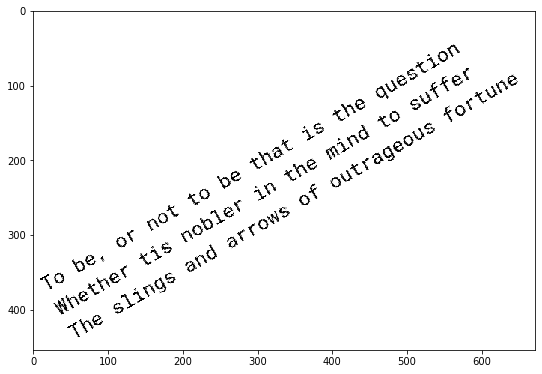

In [97]:
img_path = 'fonts/roboto_mono/short_rot30.png'
show_img(read_img(img_path, invert=False, rotate=False), scale=50)

Angle detected: -30


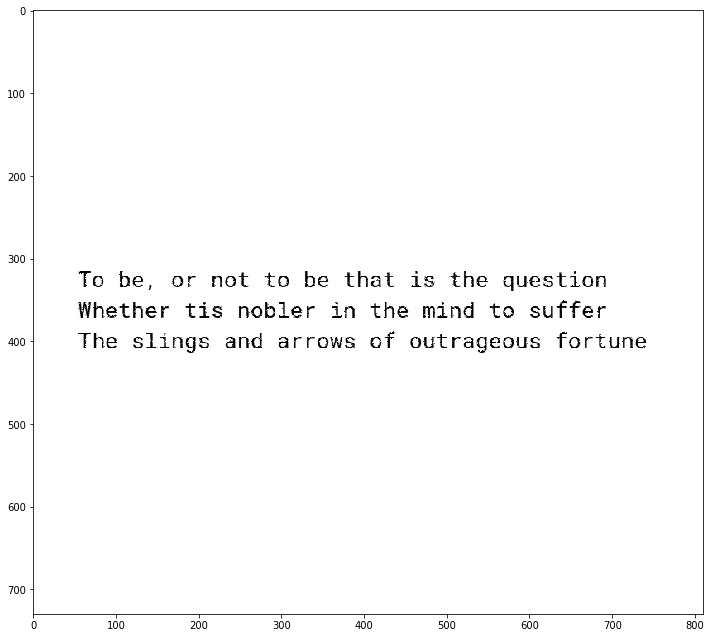

In [98]:
print('Angle detected:',detect_angle(img_path))
show_img(read_img(img_path, invert=False, rotate=True), scale=60)

In [99]:
text = ocr.read_text(img_path, 'roboto_mono')
print(text)

To be o not to be that is the question
Whether tis nobler in the mind to suffe
The slings and arro s of outrageous fortune


In [100]:
print_count(text)

Found  4 occurrences of character a
Found  3 occurrences of character b
Found  2 occurrences of character d
Found  12 occurrences of character e
Found  4 occurrences of character f
Found  2 occurrences of character g
Found  6 occurrences of character h
Found  6 occurrences of character i
Found  2 occurrences of character l
Found  1 occurrences of character m
Found  8 occurrences of character n
Found  12 occurrences of character o
Found  1 occurrences of character q
Found  6 occurrences of character r
Found  8 occurrences of character s
Found  12 occurrences of character t
Found  5 occurrences of character u
Found  2 occurrences of character T
Found  1 occurrences of character W
No other characters found


In [101]:
sans_short_rot2_dist, percent = test(img_path, 'roboto_mono', tests['short'], ocr)
print('Edit distance:', sans_short_rot2_dist, '\nEdit distance to text len:', round(percent,2), '%')

Edit distance: 6 
Edit distance to text len: 4.72 %


In [102]:
print(round(sans_short_percent, 2), '% w wersji bez szumu')
print('Zmiana', round(percent * 100 / sans_short_percent,2), '%')

3.15 % w wersji bez szumu
Zmiana 150.0 %


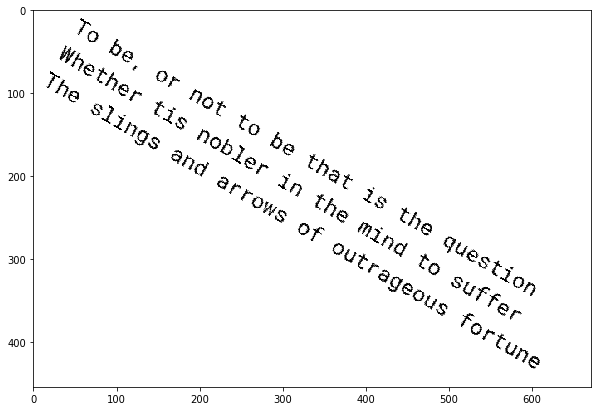

In [103]:
img_path = 'fonts/roboto_mono/short_rot-30.png'
show_img(read_img(img_path, invert=False, rotate=False), scale=45)

Angle detected: 30


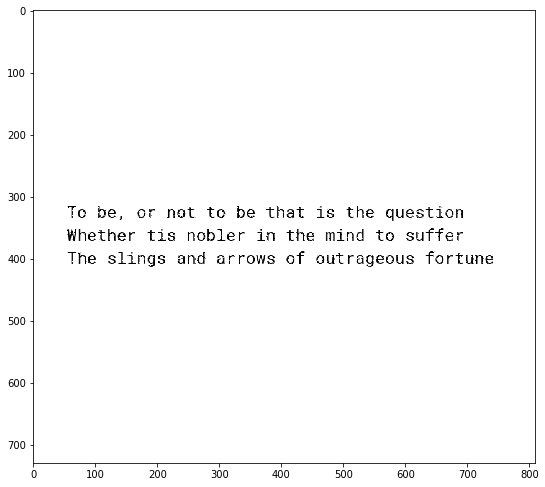

In [104]:
print('Angle detected:',detect_angle(img_path))
show_img(read_img(img_path, invert=False, rotate=True), scale=80)

In [105]:
text = ocr.read_text(img_path, 'roboto_mono')
print(text)

To be o not to be that i the que tion
Whethe tis nobler in the mind to suffe
The lings and a ro s of outrageous fortune


In [106]:
print_count(text)

Found  4 occurrences of character a
Found  3 occurrences of character b
Found  2 occurrences of character d
Found  12 occurrences of character e
Found  4 occurrences of character f
Found  2 occurrences of character g
Found  6 occurrences of character h
Found  6 occurrences of character i
Found  2 occurrences of character l
Found  1 occurrences of character m
Found  8 occurrences of character n
Found  12 occurrences of character o
Found  1 occurrences of character q
Found  4 occurrences of character r
Found  5 occurrences of character s
Found  12 occurrences of character t
Found  5 occurrences of character u
Found  2 occurrences of character T
Found  1 occurrences of character W
No other characters found


In [107]:
sans_short_rot3_dist, percent = test(img_path, 'roboto_mono', tests['short'], ocr)
print('Edit distance:', sans_short_rot3_dist, '\nEdit distance to text len:', round(percent,2), '%')

Edit distance: 11 
Edit distance to text len: 8.66 %


In [108]:
print(round(sans_short_percent, 2), '% w wersji bez szumu')
print('Zmiana', round(percent * 100 / sans_short_percent,2), '%')

3.15 % w wersji bez szumu
Zmiana 275.0 %


### Test długi

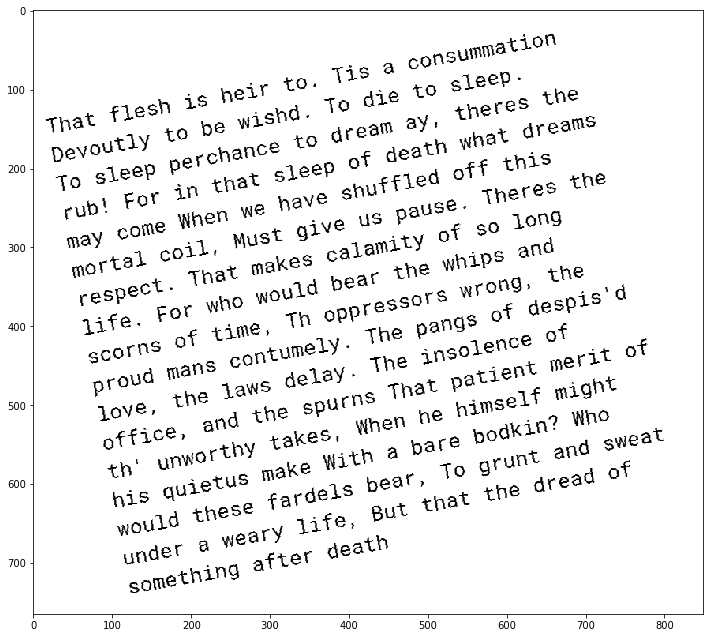

In [109]:
img_path = 'fonts/roboto_mono/long_rot10.png'
show_img(read_img(img_path, invert=False, rotate=False), scale=60)

Angle detected: -10


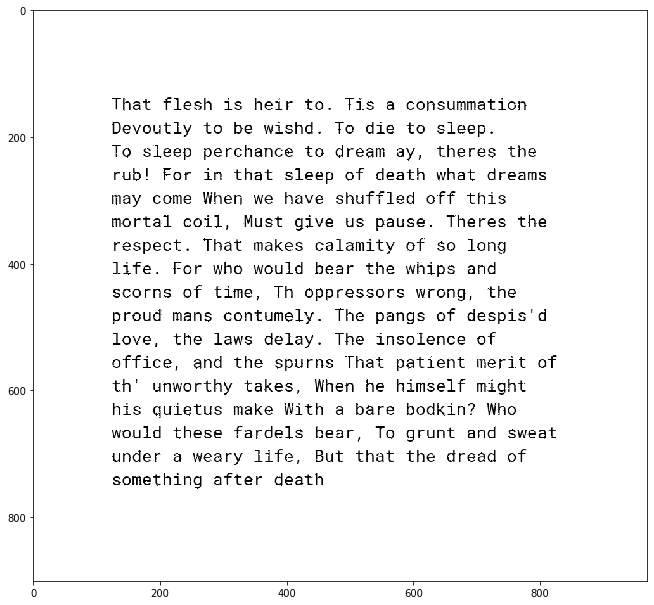

In [110]:
print('Angle detected:',detect_angle(img_path))
show_img(read_img(img_path, invert=False, rotate=True), scale=80)

In [111]:
text = ocr.read_text(img_path, 'roboto_mono')
print(text)

That flesh is he r to Tis a onsummation
Devoutly to be ishd To d e to sleep
To sleep pe han e to d eam ay theres the
ub For in that sleeP of death hat d eams
may come When e have shuffled off this
mortal coil Must give us pause Theres the
respect That makes calamity of so long
life For ho ould bear the hips and
s o ns of time Th opp esso s ong the
p oud mans contumely The pangs of despis d
love the la delay The insolence of
office and he spu ns Tha pa ent me it of
th un o thy takes When he himself m ght
his quietus make W th a bare bodkin Who
ould these fardels bea To grunt and s eat
u der a eary life But that the d ead of
something afte death


In [112]:
print_count(text)

Found  41 occurrences of character a
Found  6 occurrences of character b
Found  7 occurrences of character c
Found  21 occurrences of character d
Found  71 occurrences of character e
Found  19 occurrences of character f
Found  7 occurrences of character g
Found  41 occurrences of character h
Found  22 occurrences of character i
Found  4 occurrences of character k
Found  21 occurrences of character l
Found  17 occurrences of character m
Found  23 occurrences of character n
Found  41 occurrences of character o
Found  13 occurrences of character p
Found  1 occurrences of character q
Found  13 occurrences of character r
Found  40 occurrences of character s
Found  43 occurrences of character t
Found  18 occurrences of character u
Found  4 occurrences of character v
Found  8 occurrences of character y
Found  1 occurrences of character B
Found  1 occurrences of character D
Found  2 occurrences of character F
Found  1 occurrences of character M
Found  1 occurrences of character P
Found  11 occ

In [113]:
sans_long_rot1_dist, percent = test(img_path, 'roboto_mono', tests['long'], ocr)
print('Edit distance:', sans_long_rot1_dist, '\nEdit distance to text len:', round(percent,2), '%')

Edit distance: 80 
Edit distance to text len: 11.3 %


In [114]:
print(round(sans_long_percent, 2), '% w wersji bez szumu')
print('Zmiana', round(percent * 100 / sans_long_percent,2), '%')

7.06 % w wersji bez szumu
Zmiana 160.0 %


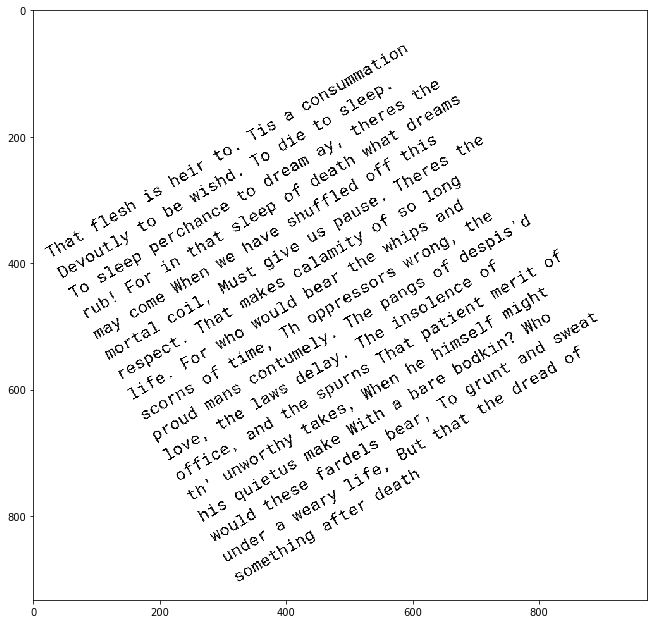

In [115]:
img_path = 'fonts/roboto_mono/long_rot30.png'
show_img(read_img(img_path, invert=False, rotate=False), scale=80)

Angle detected: -30


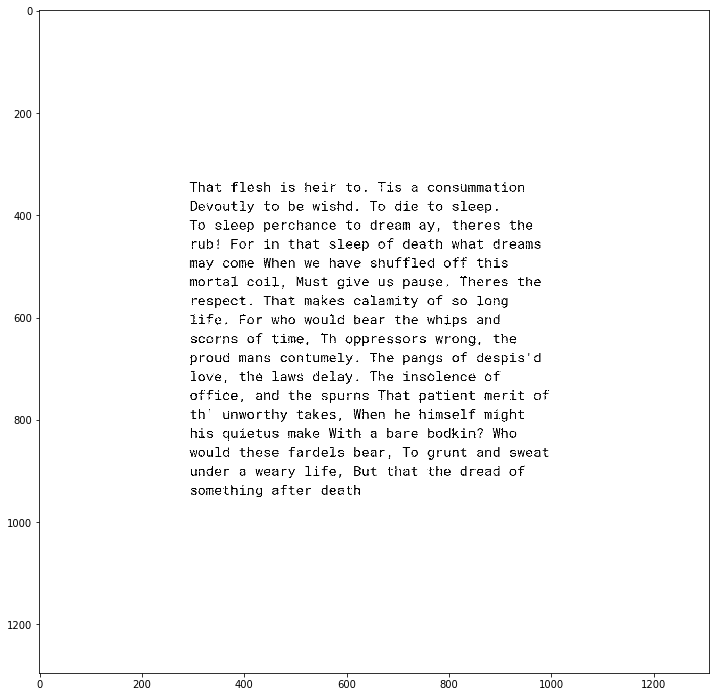

In [116]:
print('Angle detected:',detect_angle(img_path))
show_img(read_img(img_path, invert=False, rotate=True), scale=100)

In [117]:
text = ocr.read_text(img_path, 'roboto_mono')
print(text)

Tha fl h is he to is onsummation
Devoutl to be ishd To die to sleep
To sleep per hance to d eam ay theres the
ub Fo in that sleep of death hat dreams
may com When e have shuffl d off this
mo tal oil Must give us pause The es the
spect That makes alam ty of sojong
if Fo ho ould b a the hips and
s rns of time Th oppressors rong the
p oud mans ontumely The pa gs o despis d
lo e the l del y 1he in ole e of
off e a d the pu ns That pat ent m it o
th un orthy takes When he himself mzght
hi quzetus make With a ba e bodkin Who
ujd these fa dejs bea To g unt and s eat
under a ary life But that the d ead f
s mething af dea h


In [118]:
print_count(text)

Found  38 occurrences of character a
Found  6 occurrences of character b
Found  3 occurrences of character c
Found  21 occurrences of character d
Found  62 occurrences of character e
Found  17 occurrences of character f
Found  7 occurrences of character g
Found  41 occurrences of character h
Found  21 occurrences of character i
Found  3 occurrences of character j
Found  4 occurrences of character k
Found  17 occurrences of character l
Found  17 occurrences of character m
Found  21 occurrences of character n
Found  37 occurrences of character o
Found  14 occurrences of character p
Found  1 occurrences of character q
Found  10 occurrences of character r
Found  36 occurrences of character s
Found  43 occurrences of character t
Found  18 occurrences of character u
Found  3 occurrences of character v
Found  7 occurrences of character y
Found  2 occurrences of character z
Found  1 occurrences of character B
Found  1 occurrences of character D
Found  2 occurrences of character F
Found  1 occu

In [119]:
sans_long_rot2_dist, percent = test(img_path, 'roboto_mono', tests['long'], ocr)
print('Edit distance:', sans_long_rot2_dist, '\nEdit distance to text len:', round(percent,2), '%')

Edit distance: 121 
Edit distance to text len: 17.09 %


In [120]:
print(round(sans_long_percent, 2), '% w wersji bez szumu')
print('Zmiana', round(percent * 100 / sans_long_percent,2), '%')

7.06 % w wersji bez szumu
Zmiana 242.0 %


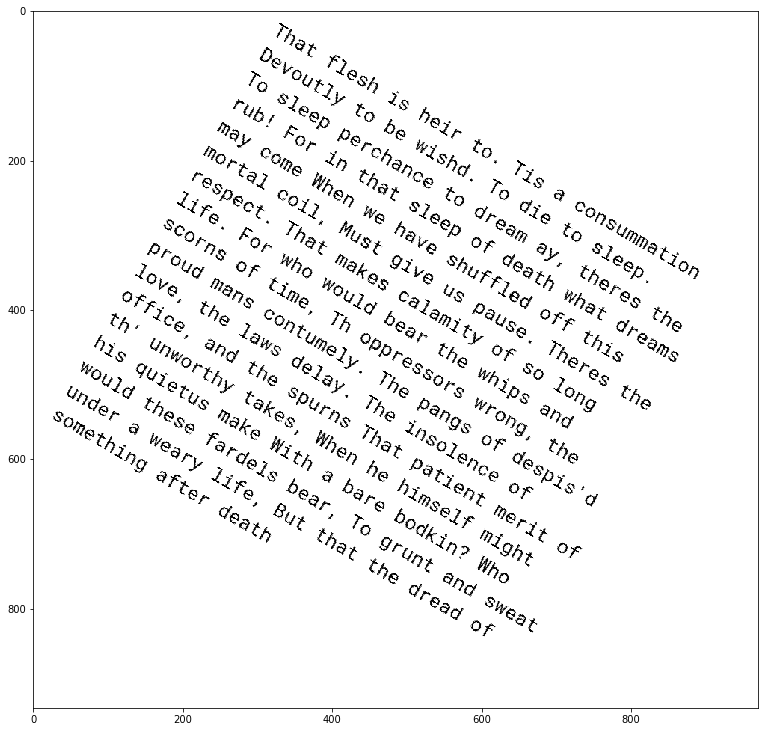

In [121]:
img_path = 'fonts/roboto_mono/long_rot-30.png'
show_img(read_img(img_path, invert=False, rotate=False), scale=70)

Angle detected: 30


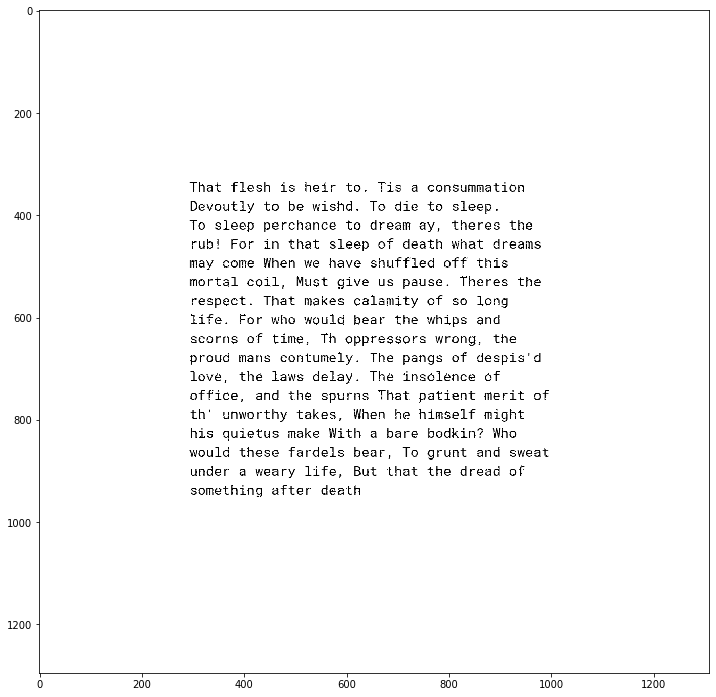

In [122]:
print('Angle detected:',detect_angle(img_path))
show_img(read_img(img_path, invert=False, rotate=True), scale=100)

In [123]:
text = ocr.read_text(img_path, 'roboto_mono')
print(text)

That flesh i he to T a co ummat n
D vou ly to be zshd To die to sleep
To sleep per han e to dre m ay he e he
rub For in that sleep of death hat d eam
may ome Wh n e h e shuffled ff thz
mo tal oil Must give us pause Theres the
pe t That mak s al mity f so1 ng
l fe Fo n culd be h n p and
sc ns of time Th oppresso s o g the
prcud man ontumely The pang of de pis d
lo e the la delay The in olen e of
offzce and h spu ha pat en m i of
th un o hy take When he him elf might
his qui t make With a ba e bodkin Who
ould thes fa del bea T grunt and eat
unde a ea y life But that the dread o
om thi g fte d ath


In [124]:
print_count(text)

Found  36 occurrences of character a
Found  6 occurrences of character b
Found  5 occurrences of character c
Found  21 occurrences of character d
Found  60 occurrences of character e
Found  18 occurrences of character f
Found  7 occurrences of character g
Found  39 occurrences of character h
Found  18 occurrences of character i
Found  4 occurrences of character k
Found  20 occurrences of character l
Found  17 occurrences of character m
Found  22 occurrences of character n
Found  32 occurrences of character o
Found  14 occurrences of character p
Found  1 occurrences of character q
Found  9 occurrences of character r
Found  21 occurrences of character s
Found  37 occurrences of character t
Found  17 occurrences of character u
Found  2 occurrences of character v
Found  8 occurrences of character y
Found  3 occurrences of character z
Found  1 occurrences of character B
Found  1 occurrences of character D
Found  2 occurrences of character F
Found  1 occurrences of character M
Found  10 occu

In [125]:
sans_long_rot3_dist, percent = test(img_path, 'roboto_mono', tests['long'], ocr)
print('Edit distance:', sans_long_rot3_dist, '\nEdit distance to text len:', round(percent,2), '%')

Edit distance: 153 
Edit distance to text len: 21.61 %


In [126]:
print(round(sans_long_percent, 2), '% w wersji bez szumu')
print('Zmiana', round(percent * 100 / sans_long_percent,2), '%')

7.06 % w wersji bez szumu
Zmiana 306.0 %


### Serif
### Test krótki

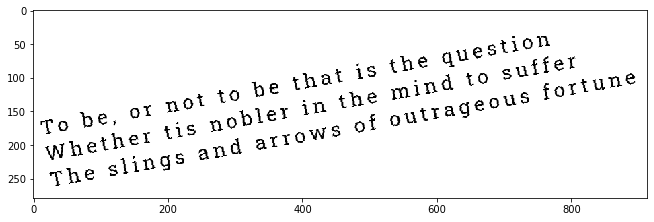

In [127]:
img_path = 'fonts/roboto_slab/short_rot10.png'
show_img(read_img(img_path, invert=False, rotate=False), scale=25)

Angle detected: -10


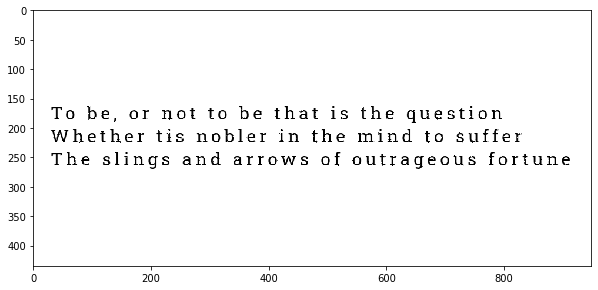

In [128]:
print('Angle detected:',detect_angle(img_path))
show_img(read_img(img_path, invert=False, rotate=True), scale=40)

In [129]:
text = ocr.read_text(img_path, 'roboto_slab')
print(text)

To be or not o bethatisthe question
Whe herti nobHrintherm ndto s fMer
The s ngs apd arrows cf outrag ousfortune


In [130]:
print_count(text)

Found  4 occurrences of character a
Found  3 occurrences of character b
Found  1 occurrences of character c
Found  2 occurrences of character d
Found  10 occurrences of character e
Found  3 occurrences of character f
Found  2 occurrences of character g
Found  6 occurrences of character h
Found  4 occurrences of character i
Found  1 occurrences of character m
Found  7 occurrences of character n
Found  11 occurrences of character o
Found  1 occurrences of character p
Found  1 occurrences of character q
Found  9 occurrences of character r
Found  7 occurrences of character s
Found  10 occurrences of character t
Found  4 occurrences of character u
Found  1 occurrences of character w
Found  1 occurrences of character H
Found  1 occurrences of character M
Found  2 occurrences of character T
Found  1 occurrences of character W
No other characters found


In [131]:
serif_short_rot1_dist, percent = test(img_path, 'roboto_slab', tests['short'], ocr)
print('Edit distance:', serif_short_rot1_dist, '\nEdit distance to text len:', round(percent,2), '%')

Edit distance: 25 
Edit distance to text len: 19.69 %


In [132]:
print(round(serif_short_percent, 2), '% w wersji bez szumu')
print('Zmiana', round(percent * 100 / serif_short_percent,2), '%')

14.96 % w wersji bez szumu
Zmiana 131.58 %


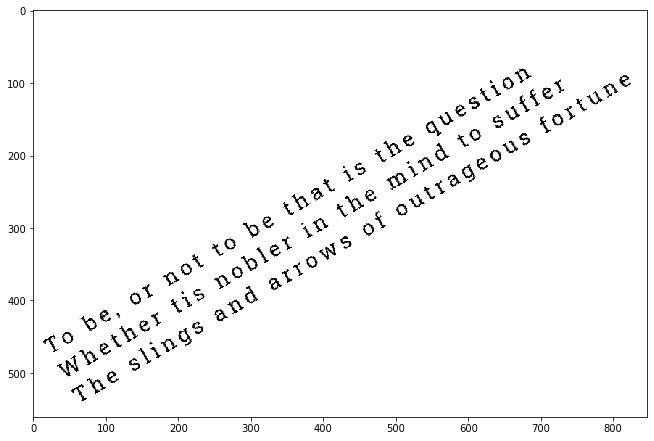

In [133]:
img_path = 'fonts/roboto_slab/short_rot30.png'
show_img(read_img(img_path, invert=False, rotate=False), scale=50)

Angle detected: -30


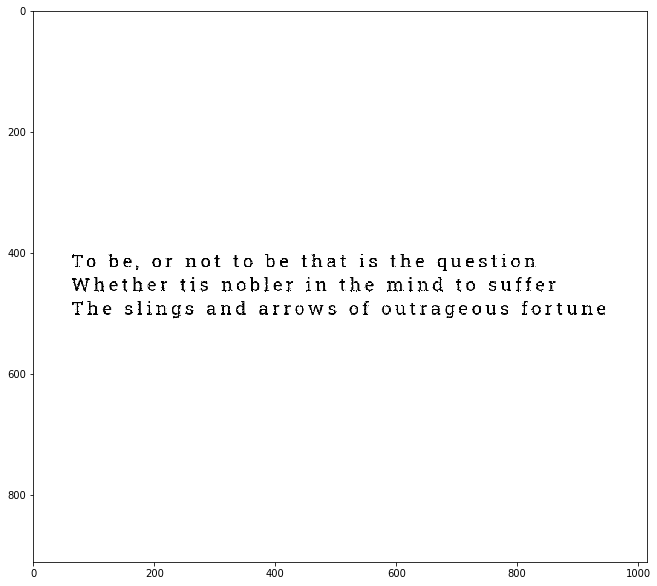

In [134]:
print('Angle detected:',detect_angle(img_path))
show_img(read_img(img_path, invert=False, rotate=True), scale=80)

In [135]:
text = ocr.read_text(img_path, 'roboto_slab')
print(text)

To b or not o bethz sthe question
Whethertis nob er nthe rm ndto sufM r
The s ngs and arrcws of outrageousforture


In [136]:
print_count(text)

Found  3 occurrences of character a
Found  3 occurrences of character b
Found  1 occurrences of character c
Found  2 occurrences of character d
Found  10 occurrences of character e
Found  3 occurrences of character f
Found  2 occurrences of character g
Found  6 occurrences of character h
Found  2 occurrences of character i
Found  1 occurrences of character m
Found  7 occurrences of character n
Found  11 occurrences of character o
Found  1 occurrences of character q
Found  10 occurrences of character r
Found  8 occurrences of character s
Found  10 occurrences of character t
Found  5 occurrences of character u
Found  1 occurrences of character w
Found  1 occurrences of character z
Found  1 occurrences of character M
Found  2 occurrences of character T
Found  1 occurrences of character W
No other characters found


In [137]:
serif_short_rot2_dist, percent = test(img_path, 'roboto_slab', tests['short'], ocr)
print('Edit distance:', serif_short_rot2_dist, '\nEdit distance to text len:', round(percent,2), '%')

Edit distance: 24 
Edit distance to text len: 18.9 %


In [138]:
print(round(serif_short_percent, 2), '% w wersji bez szumu')
print('Zmiana', round(percent * 100 / serif_short_percent,2), '%')

14.96 % w wersji bez szumu
Zmiana 126.32 %


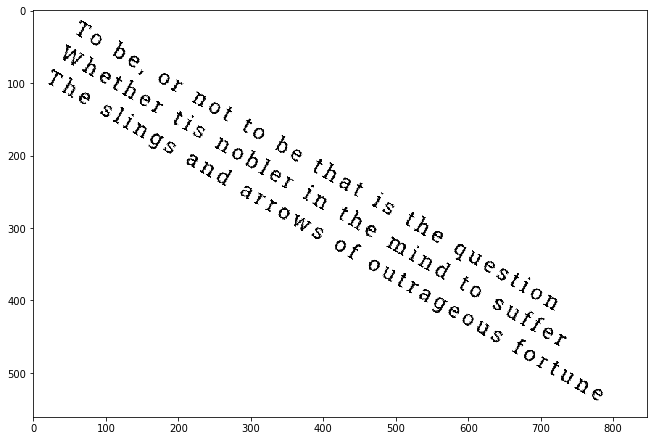

In [139]:
img_path = 'fonts/roboto_slab/short_rot-30.png'
show_img(read_img(img_path, invert=False, rotate=False), scale=50)

Angle detected: 30


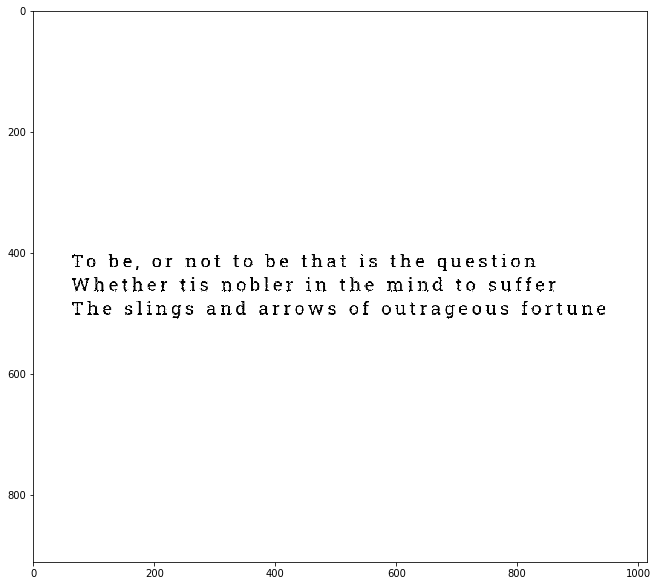

In [140]:
print('Angle detected:',detect_angle(img_path))
show_img(read_img(img_path, invert=False, rotate=True), scale=80)

In [141]:
text = ocr.read_text(img_path, 'roboto_slab')
print(text)

To be or not o b tha isthe question
Whethertis nob erintherm ndto s fM r
Tke s ngs and a rcws cH outrag ousfortune


In [142]:
print_count(text)

Found  4 occurrences of character a
Found  3 occurrences of character b
Found  2 occurrences of character c
Found  2 occurrences of character d
Found  9 occurrences of character e
Found  2 occurrences of character f
Found  2 occurrences of character g
Found  5 occurrences of character h
Found  4 occurrences of character i
Found  1 occurrences of character k
Found  1 occurrences of character m
Found  8 occurrences of character n
Found  10 occurrences of character o
Found  1 occurrences of character q
Found  8 occurrences of character r
Found  8 occurrences of character s
Found  10 occurrences of character t
Found  4 occurrences of character u
Found  1 occurrences of character w
Found  1 occurrences of character H
Found  1 occurrences of character M
Found  2 occurrences of character T
Found  1 occurrences of character W
No other characters found


In [143]:
serif_short_rot3_dist, percent = test(img_path, 'roboto_slab', tests['short'], ocr)
print('Edit distance:', serif_short_rot3_dist, '\nEdit distance to text len:', round(percent,2), '%')

Edit distance: 26 
Edit distance to text len: 20.47 %


In [144]:
print(round(serif_short_percent, 2), '% w wersji bez szumu')
print('Zmiana', round(percent * 100 / serif_short_percent,2), '%')

14.96 % w wersji bez szumu
Zmiana 136.84 %


### Test długi

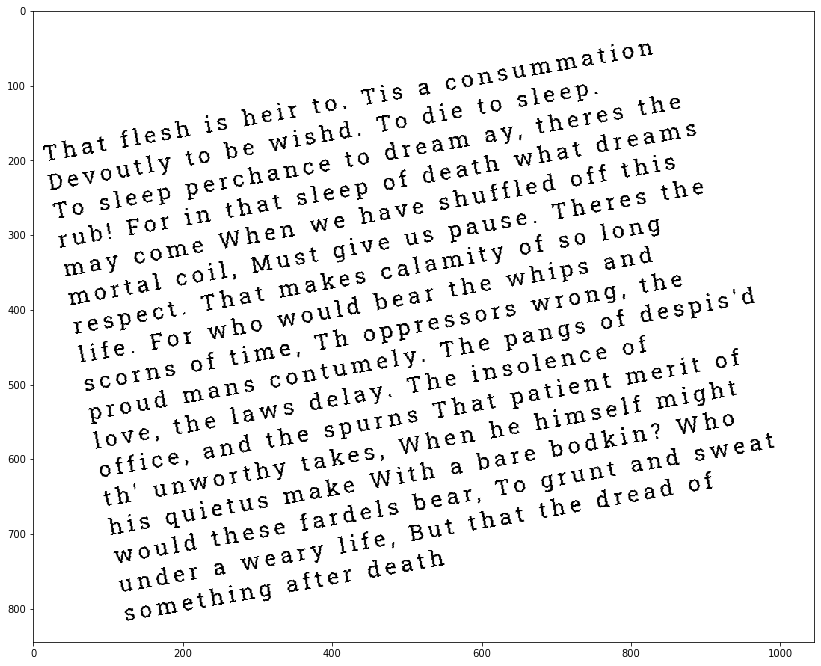

In [145]:
img_path = 'fonts/roboto_slab/long_rot10.png'
show_img(read_img(img_path, invert=False, rotate=False), scale=60)

Angle detected: -10


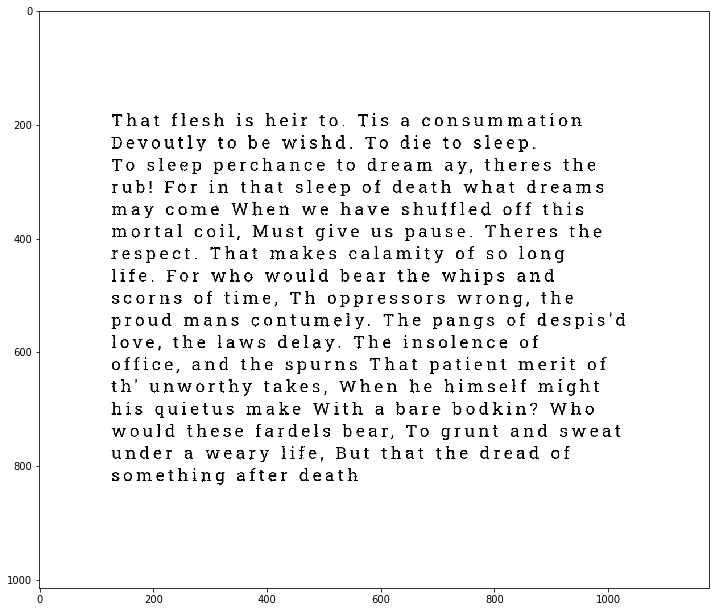

In [146]:
print('Angle detected:',detect_angle(img_path))
show_img(read_img(img_path, invert=False, rotate=True), scale=80)

In [147]:
text = ocr.read_text(img_path, 'roboto_slab')
print(text)

Tlatf eshis he rto Tis a ons rmrma on
Devcutlyto be ishd To dieto s eep
To sl ep per hanceto drearm ay th re he
rub Fcrintha sleep ot death what drea ms
rmay cc me Ahen we have shuffled cffthis
rmorta col Mus give us pause Theresthe
respect Tlat makes a armitY of solong
life For who u d bearthe hips and
scorns of me Th oppressors wrcng he
proud rmans conturmely The pangs of desp s o
lcve th laws de ay Theinsolence f
ofic andthe purns Th t patientrme it of
th nworthytakes When he h nself night
h s q etus make W l a bare bcdkin Aho
wo d lesefardels b ar To g n and sweat
n1er a wearylife But latthe dr ad of
so meling after death


In [148]:
print_count(text)

Found  40 occurrences of character a
Found  6 occurrences of character b
Found  15 occurrences of character c
Found  19 occurrences of character d
Found  65 occurrences of character e
Found  17 occurrences of character f
Found  7 occurrences of character g
Found  35 occurrences of character h
Found  18 occurrences of character i
Found  4 occurrences of character k
Found  20 occurrences of character l
Found  15 occurrences of character m
Found  26 occurrences of character n
Found  33 occurrences of character o
Found  14 occurrences of character p
Found  1 occurrences of character q
Found  35 occurrences of character r
Found  39 occurrences of character s
Found  36 occurrences of character t
Found  12 occurrences of character u
Found  4 occurrences of character v
Found  9 occurrences of character w
Found  7 occurrences of character y
Found  2 occurrences of character A
Found  1 occurrences of character B
Found  1 occurrences of character D
Found  2 occurrences of character F
Found  1 occ

In [149]:
serif_long_rot1_dist, percent = test(img_path, 'roboto_slab', tests['long'], ocr)
print('Edit distance:', serif_long_rot1_dist, '\nEdit distance to text len:', round(percent,2), '%')

Edit distance: 142 
Edit distance to text len: 20.06 %


In [150]:
print(round(serif_long_percent, 2), '% w wersji bez szumu')
print('Zmiana', round(percent * 100 / serif_long_percent,2), '%')

15.68 % w wersji bez szumu
Zmiana 127.93 %


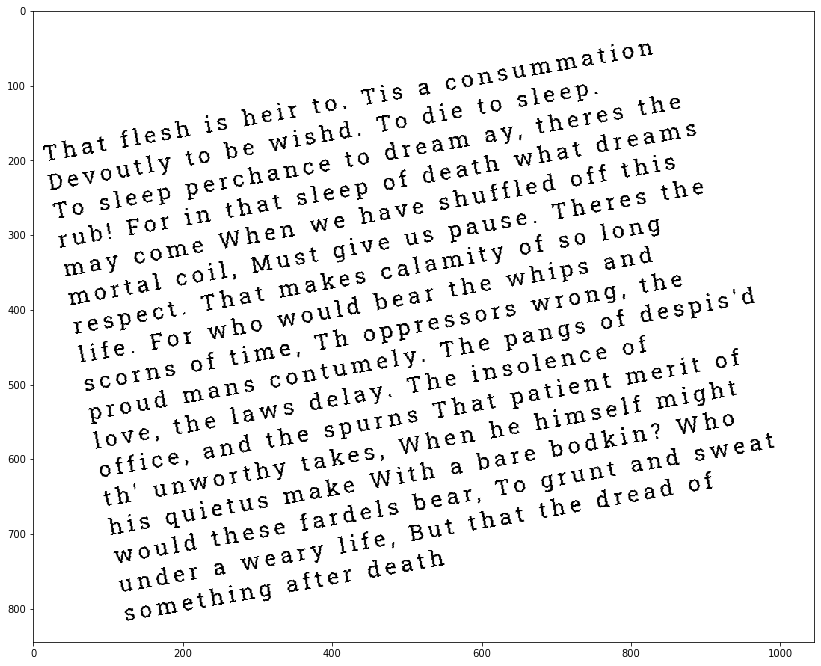

In [151]:
img_path = 'fonts/roboto_slab/long_rot10.png'
show_img(read_img(img_path, invert=False, rotate=False), scale=60)

Angle detected: -10


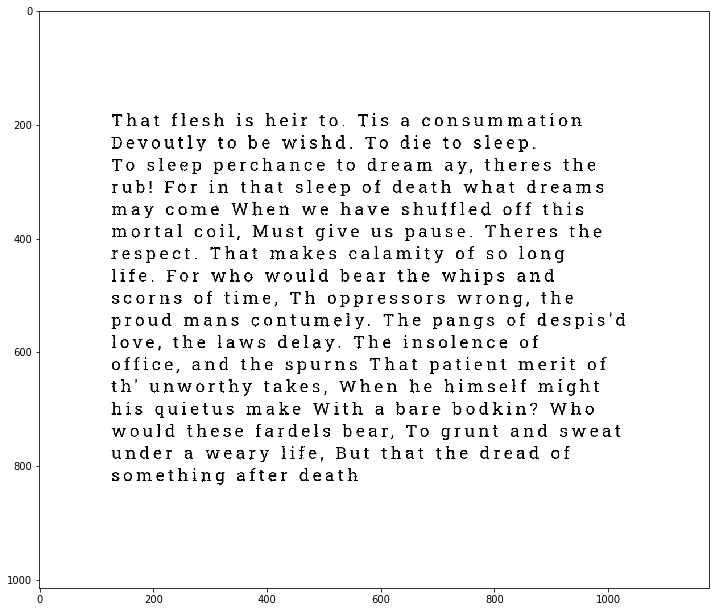

In [152]:
print('Angle detected:',detect_angle(img_path))
show_img(read_img(img_path, invert=False, rotate=True), scale=80)

In [153]:
text = ocr.read_text(img_path, 'roboto_slab')
print(text)

Tlatf eshis he rto Tis a ons rmrma on
Devcutlyto be ishd To dieto s eep
To sl ep per hanceto drearm ay th re he
rub Fcrintha sleep ot death what drea ms
rmay cc me Ahen we have shuffled cffthis
rmorta col Mus give us pause Theresthe
respect Tlat makes a armitY of solong
life For who u d bearthe hips and
scorns of me Th oppressors wrcng he
proud rmans conturmely The pangs of desp s o
lcve th laws de ay Theinsolence f
ofic andthe purns Th t patientrme it of
th nworthytakes When he h nself night
h s q etus make W l a bare bcdkin Aho
wo d lesefardels b ar To g n and sweat
n1er a wearylife But latthe dr ad of
so meling after death


In [154]:
print_count(text)

Found  40 occurrences of character a
Found  6 occurrences of character b
Found  15 occurrences of character c
Found  19 occurrences of character d
Found  65 occurrences of character e
Found  17 occurrences of character f
Found  7 occurrences of character g
Found  35 occurrences of character h
Found  18 occurrences of character i
Found  4 occurrences of character k
Found  20 occurrences of character l
Found  15 occurrences of character m
Found  26 occurrences of character n
Found  33 occurrences of character o
Found  14 occurrences of character p
Found  1 occurrences of character q
Found  35 occurrences of character r
Found  39 occurrences of character s
Found  36 occurrences of character t
Found  12 occurrences of character u
Found  4 occurrences of character v
Found  9 occurrences of character w
Found  7 occurrences of character y
Found  2 occurrences of character A
Found  1 occurrences of character B
Found  1 occurrences of character D
Found  2 occurrences of character F
Found  1 occ

In [155]:
serif_long_rot2_dist, percent = test(img_path, 'roboto_slab', tests['long'], ocr)
print('Edit distance:', serif_long_rot2_dist, '\nEdit distance to text len:', round(percent,2), '%')

Edit distance: 142 
Edit distance to text len: 20.06 %


In [156]:
print(round(serif_long_percent, 2), '% w wersji bez szumu')
print('Zmiana', round(percent * 100 / serif_long_percent,2), '%')

15.68 % w wersji bez szumu
Zmiana 127.93 %


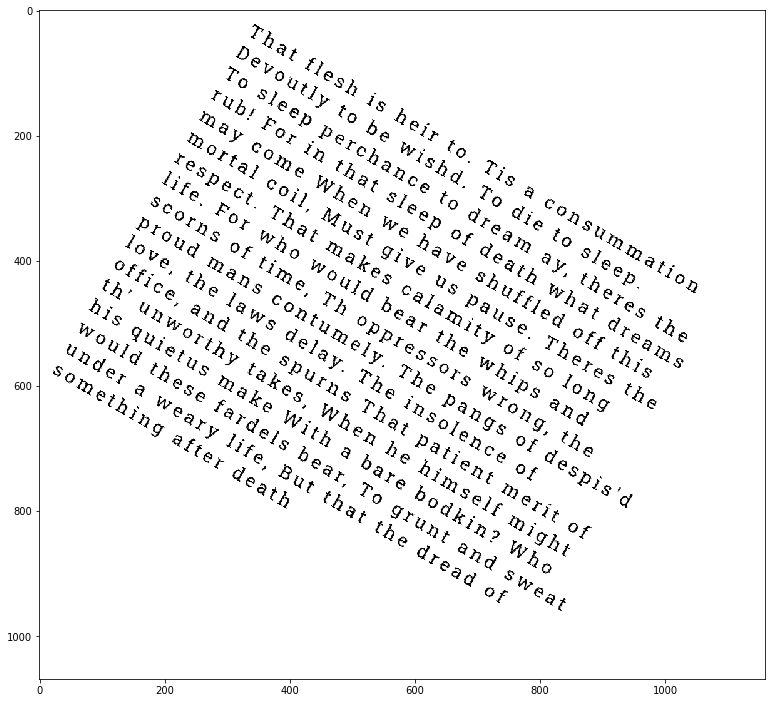

In [157]:
img_path = 'fonts/roboto_slab/long_rot-30.png'
show_img(read_img(img_path, invert=False, rotate=False), scale=80)

Angle detected: 30


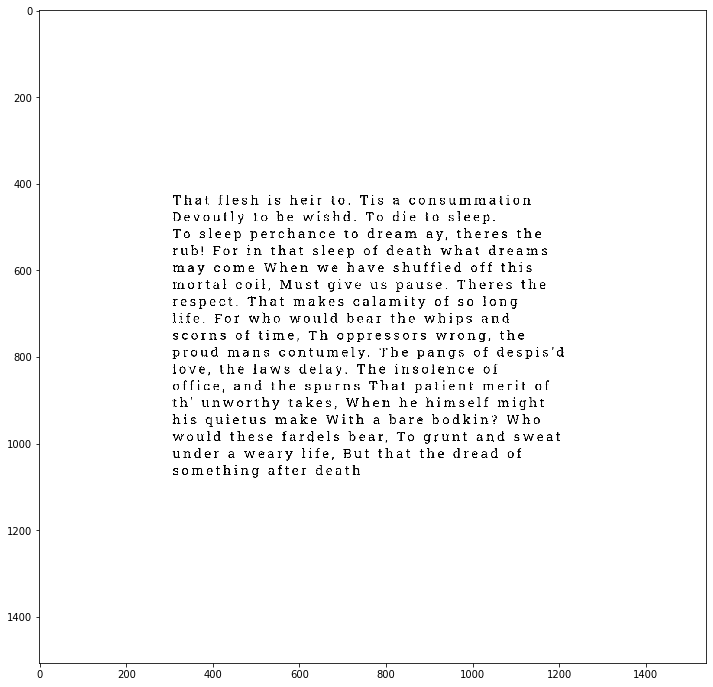

In [158]:
print('Angle detected:',detect_angle(img_path))
show_img(read_img(img_path, invert=False, rotate=True), scale=120)

In [159]:
text = ocr.read_text(img_path, 'roboto_slab')
print(text)

Tlatf eshis he o T a cons rmrma on
Devcut yto oe wishd To oieto eep
To sleep perchance o d e rm ay the e the
rub Fc ntha sleep of death ha drea ms
may corme Alen we have s uff ed offthis
rmorta col Mus give us pause Theresthe
respec Tla makes ca armity of solong
e For who ou d bearthe l ps and
scorns oft me Th opp essors wrong he
proud rm ns contu mely Ihe p ngs of d sp s o
love thelaws de ay Theinso ence o
ofice and he spurns That pat en rmert of
h nworthytakes When he h mselfrmight
h s q e srmake W h a bare bodkin Aho
wou d lesefardels bear To g nt nd s eat
noer a wearylife But hatthe dread of
so mel rg after death


In [160]:
print_count(text)

Found  37 occurrences of character a
Found  5 occurrences of character b
Found  13 occurrences of character c
Found  18 occurrences of character d
Found  70 occurrences of character e
Found  16 occurrences of character f
Found  7 occurrences of character g
Found  34 occurrences of character h
Found  11 occurrences of character i
Found  4 occurrences of character k
Found  16 occurrences of character l
Found  17 occurrences of character m
Found  23 occurrences of character n
Found  43 occurrences of character o
Found  14 occurrences of character p
Found  1 occurrences of character q
Found  33 occurrences of character r
Found  38 occurrences of character s
Found  29 occurrences of character t
Found  12 occurrences of character u
Found  4 occurrences of character v
Found  8 occurrences of character w
Found  8 occurrences of character y
Found  2 occurrences of character A
Found  1 occurrences of character B
Found  1 occurrences of character D
Found  2 occurrences of character F
Found  1 occ

In [161]:
serif_long_rot3_dist, percent = test(img_path, 'roboto_slab', tests['long'], ocr)
print('Edit distance:', serif_long_rot3_dist, '\nEdit distance to text len:', round(percent,2), '%')

Edit distance: 155 
Edit distance to text len: 21.89 %


In [162]:
print(round(serif_long_percent, 2), '% w wersji bez szumu')
print('Zmiana', round(percent * 100 / serif_long_percent,2), '%')

15.68 % w wersji bez szumu
Zmiana 139.64 %


### Wnioski

Pomimo poprawnego działania funkcji korygującej przekrzywienie obrazu, ma miejsce zauważalny spadek dokładności działania programu.

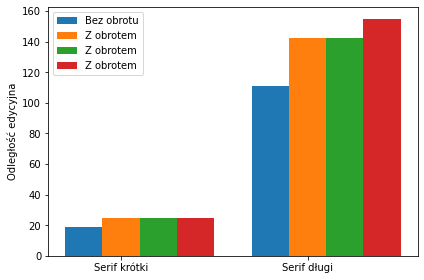

In [163]:
labels = ['Serif krótki', 'Serif długi']
first = [serif_short_dist, serif_long_dist]
second = [serif_short_rot1_dist, serif_long_rot1_dist]
third = [serif_short_rot1_dist, serif_long_rot2_dist]
fourth = [serif_short_rot1_dist, serif_long_rot3_dist]

show_bar_plot_4(first, second, third, fourth, labels, 'Bez obrotu', 'Z obrotem', 'Z obrotem', 'Z obrotem', 'Odległość edycyjna')

Dzieje się tak dlatego, że obraz obrócony nawet o ten sam kąt, nie jest w istocie tym samym obrazem, gdyż ulega zaszumieniu podczas tego przekształcenia. Efekt ten możemy zaobserwować na poniższych zbliżeniach. 

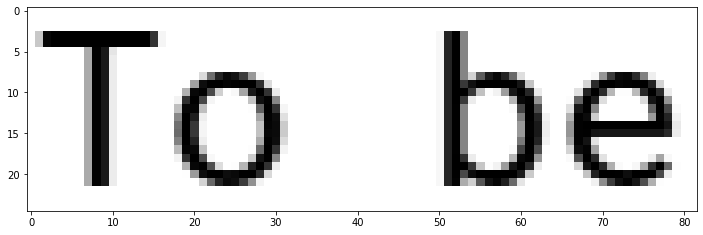

In [164]:
img = Image.open('fonts/roboto_mono/short.png').convert('L').crop((3,5,85,30))
show_img(np.asarray(img), scale=2)

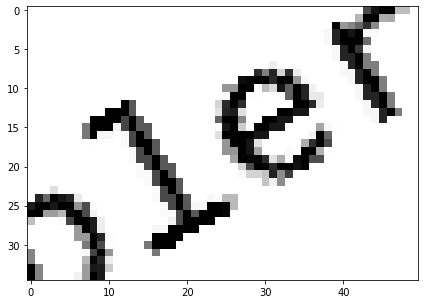

In [165]:
img = Image.open('fonts/roboto_mono/short_rot30.png').convert('L').crop((230,255,280,290))
show_img(np.asarray(img), scale=5)

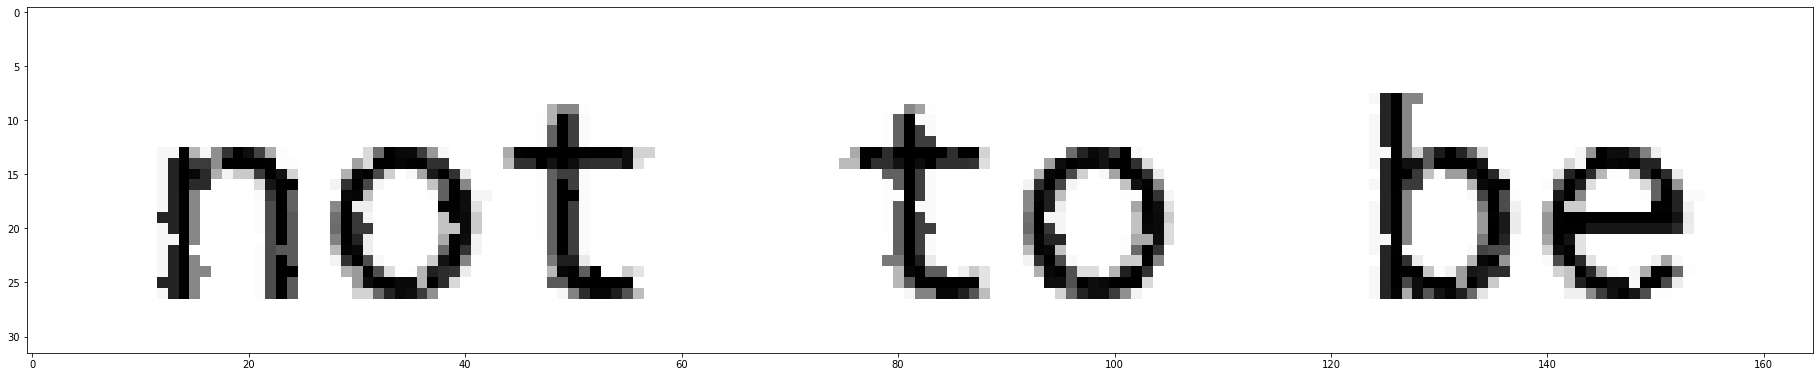

In [166]:
img = Image.open('fonts/roboto_mono/short_rot30.png').convert('L').rotate(-30).crop((135,170,300,202))
show_img(np.asarray(img), scale=1)

## Wnioski z laboratorium

Implementacja programu OCR z użyciem metody DFT jest możliwa, lecz niewygodna w praktyce. 

Działania tak zaimplementowanego algorytmu jest silnie zależne od czynników takich jak wczesniejsze przygotowanie tekstu, zaszumienie obrazu, odległości między literami, wielkość liter, czy typ użytej czcionki. 

Z pozoru drobne zmiany charakterystyki czcionki użytej w czytanych dokumentach ma duży wpływ na wyniki działania. Zmiany te mogą mieć również charakter drobnych zniekształceń rozkodowywanego obrazu. 

Dokładny kształt każdej rozpoznawanej przez program litery musi być znany z wyprzedzeniem. 
Algorytm implementujący tą metodę lepiej radzi sobie z prostszymi, bezszeryfowymi czcionkami.